Getting started

In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, QuantileTransformer
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import spotify_enrichment

## Data gathering

In [2]:
playlist_df = pd.read_csv('playlists.csv')
playlists = playlist_dict = playlist_df.to_dict('list')
playlist_df

,playlistid,event,type
0,37i9dQZF1EIh5QTm0PNBlW,Rain,Weather
1,37i9dQZF1DX4aYNO8X5RpR,Rain,Weather
2,4X4dEJ2dDkT11S8UBR6wTO,Rain,Weather
3,5VLlCachyPIcIUOqPnptIB,Rain,Weather
4,6SLANwuSCx0B23XF4cIcaO,Rain,Weather
...,...,...,...
94,37i9dQZF1EIdvkdlmXsh0P,Winter,Season
95,4raqLXnmb8WYkjfed9olAR,Winter,Season
96,2wHoLVKBpuei1AFQ3fLFhW,Winter,Season
97,37i9dQZF1DX97m5YXQMpCi,Winter,Season


In [3]:
season_playlists = {key: [value[i] for i in range(len(playlists['type'])) if playlists['type'][i] == 'Season'] for key, value in playlists.items()}
weather_playlists = {key: [value[i] for i in range(len(playlists['type'])) if playlists['type'][i] == 'Weather'] for key, value in playlists.items()}

#### Testing data

In [4]:
# test_playlists =  {
#     'playlistid': [
#         '37i9dQZF1EIh5QTm0PNBlW', '4raqLXnmb8WYkjfed9olAR'
#     ],
#     'event': [
#         'Rain', 'Winter'
#     ],
#     'type': [
#         'Weather', 'Season'
#     ]
# }

# test_pull = spotify_enrichment.process_playlists(test_playlists)
# test_pull[0]

Processing Playlist 1/2
Getting track info for playlist 37i9dQZF1EIh5QTm0PNBlW
Getting tracks for playlist 37i9dQZF1EIh5QTm0PNBlW
Getting audio features for track ids ['0VhgEqMTNZwYL1ARDLLNCX', '3hRV0jL3vUpRrcy398teAU', '2LawezPeJhN4AWuSB0GtAU', '2QjOHCTQ1Jl3zawyYOpxh6', '1xK59OXxi2TAAAbmZK0kBL', '6DESft0qm6RhoYf5wzeoGH', '4RL77hMWUq35NYnPLXBpih', '0SUDiaR0qm30fXVGPjPvRp', '6Kkt27YmFyIFrcX3QXFi2o', '0baNzeUcPQnQSagpe8T0mD', '6O5TrlFWTYvznd9fMC0VvU', '55Am8neGJkdj2ADaM3aw5H', '1v1oIWf2Xgh54kIWuKsDf6', '0sY6ZUTh4yoctD8VIXz339', '1GxNPd5r7D1zChEMuMhue0', '37zuIvk4KBkAxxLJsxJaHq', '2dW05vYi45Fd65qGrVzPEB', '2TktkzfozZifbQhXjT6I33', '5GbVzc6Ex5LYlLJqzRQhuy', '54KFQB6N4pn926IUUYZGzK', '0YywjDvFudcaHG74NuWISy', '0Z5ok0QLLttAKsujOZYOXf', '5uCax9HTNlzGybIStD3vDh', '4nZi6XNe36Ut4Nij3IQ1yC', '7bhI6rnvaVw8qgZPn32qE0', '3p1kSUxsCux5Zf1CeKxpqh', '5aRZk9oWIYUB5alrTs8TTV', '4k7x3QKrc3h3U0Viqk0uop', '7jtQIBanIiJOMS6RyCx6jZ', '2uhEKg8kIzpdvz4gyy6x8W', '4xqrdfXkTW4T0RauPLv3WA', '1zNXF2svmdlNxfS5XeNUgr', 

c:\mattgraham93.github.io\musical_weather\spotify_enrichment.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df.loc[:, column + "_st_scale"] = scaler.fit_transform(playlist_df[[column]])
c:\mattgraham93.github.io\musical_weather\spotify_enrichment.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df.loc[:, column + "_power_transform"] = power_transformer.fit_transform(playlist_df[[column]])
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning:

,energy,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,song,track_id,artist,...,acousticness_quantile_transform,instrumentalness_quantile_transform,liveness_quantile_transform,valence_quantile_transform,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,score
0,0.543,0.0489,0.3080,0.000000,0.0939,0.4790,4,James Arthur,0VhgEqMTNZwYL1ARDLLNCX,Can I Be Him,...,0.157534,0.000000,0.226027,0.835616,107.969,246880,0.283106,0.907534,1,-3472.672260
1,0.369,0.0452,0.9680,0.272000,0.6380,0.0998,3,Lord Huron,3hRV0jL3vUpRrcy398teAU,The Night We Met,...,0.945205,0.828767,0.993151,0.085616,174.097,208212,-1.804940,0.986301,1,-1907.053980
2,0.697,0.0277,0.0664,0.000023,0.1330,0.7740,4,Creedence Clearwater Revival,2LawezPeJhN4AWuSB0GtAU,Have You Ever Seen The Rain,...,0.054795,0.273973,0.715753,0.993151,116.109,160133,0.283106,0.972603,1,-3013.900961
3,0.807,0.0336,0.0495,0.017700,0.1010,0.3980,4,The Neighbourhood,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,...,0.037671,0.667808,0.342466,0.705479,124.053,240400,0.283106,1.000000,1,-3299.831389
4,0.544,0.0299,0.4530,0.008050,0.3220,0.2160,4,d4vd,1xK59OXxi2TAAAbmZK0kBL,Romantic Homicide,...,0.239726,0.623288,0.955479,0.356164,132.052,132631,0.283106,0.972603,1,-1953.384636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.399,0.0544,0.8910,0.005800,0.2030,0.5200,4,Bon Iver,56A3kiXcOAmz6LxxUNfIYf,iMi,...,0.729452,0.609589,0.849315,0.863014,133.975,196360,0.283106,0.359589,0,2581.646576
146,0.286,0.0335,0.8730,0.000361,0.0969,0.2160,4,Bon Iver,0RstfX9nRY1Lfuy1808MoT,"Hey, Ma",...,0.691781,0.424658,0.273973,0.356164,144.296,216707,0.283106,0.476027,0,2161.912642
147,0.408,0.0427,0.8030,0.023300,0.6790,0.1720,4,Bon Iver,0XOsqpvDLx0FhizUCqwSNf,Naeem,...,0.561644,0.684932,1.000000,0.256849,124.914,262267,0.283106,0.349315,0,2905.580511
148,0.473,0.0479,0.5890,0.000149,0.1110,0.2350,4,Jome,7pJ8EpupQvfomVNPtfneql,Cinnamon,...,0.342466,0.376712,0.530822,0.417808,139.956,204000,0.283106,0.000000,0,2328.900960


In [5]:
# test_pull[0].columns

Index(['energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'time_signature', 'song', 'track_id', 'artist', 'event',
       'type', 'popularity', 'energy_st_scale', 'energy_power_transform',
       'mode_st_scale', 'mode_power_transform', 'mode_quantile_transform',
       'speechiness_st_scale', 'speechiness_power_transform',
       'acousticness_st_scale', 'acousticness_power_transform',
       'instrumentalness_st_scale', 'instrumentalness_power_transform',
       'liveness_st_scale', 'liveness_power_transform', 'valence_st_scale',
       'valence_power_transform', 'time_signature_st_scale',
       'time_signature_quantile_transform', 'popularity_st_scale',
       'popularity_power_transform', 'is_precipitation_st_scale',
       'is_precipitation_power_transform',
       'is_precipitation_quantile_transform', 'danceability',
       'energy_quantile_transform', 'key', 'loudness', 'mode',
       'speechiness_quantile_transform', 'acousticness_quant

### Gather data from Spotify

In [3]:
playlist_data, playlists_without_track_info, playlists_without_data = spotify_enrichment.process_playlists(playlists)
# playlist_data = pd.read_csv('spotify_data.csv')

Processing Playlist 1/99
Getting track info for playlist 37i9dQZF1EIh5QTm0PNBlW
Getting tracks for playlist 37i9dQZF1EIh5QTm0PNBlW
Getting audio features for 50 track ids
Processed Song 50: Sleeping At Last - Artist: Hearingete Daydreamsxmaster At All)ain
Finished processing playlist 37i9dQZF1EIh5QTm0PNBlW
Processing Playlist 2/99
Getting track info for playlist 37i9dQZF1DX4aYNO8X5RpR
Getting tracks for playlist 37i9dQZF1DX4aYNO8X5RpR
Getting audio features for 100 track ids
Processed Song 98: Ray N.Y - Artist: Cozy Rainder Coverd Thunderh Thundertant Stormunder
Finished processing playlist 37i9dQZF1DX4aYNO8X5RpR
Processing Playlist 3/99
Getting track info for playlist 4X4dEJ2dDkT11S8UBR6wTO
Getting tracks for playlist 4X4dEJ2dDkT11S8UBR6wTO
Getting audio features for 100 track ids
Processed Song 100: jagger finn - Artist: Vase Songigh)Girler JeanSads) the Darkigh?
Finished processing playlist 4X4dEJ2dDkT11S8UBR6wTO
Processing Playlist 4/99
Getting track info for playlist 5VLlCachyPIcI

c:\mattgraham93.github.io\musical_weather\spotify_enrichment.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df.loc[:, column + "_st_scale"] = scaler.fit_transform(playlist_df[[column]])
c:\mattgraham93.github.io\musical_weather\spotify_enrichment.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df.loc[:, column + "_power_transform"] = power_transformer.fit_transform(playlist_df[[column]])
c:\mattgraham93.github.io\musical_weather\spotify_enrichment.py:113: SettingWithCopyWarnin

Calculating grouped scores


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [20]:
playlist_data.to_csv('spotify_data.csv', index=False)

In [7]:
playlist_data = pd.read_csv('spotify_data.csv')

In [22]:
pd.DataFrame(playlist_data.groupby('event')['artist'].value_counts().groupby(level=0).idxmax())
# playlist_data.groupby('event')['artist'].value_counts().groupby(level=0).idxmax()

,artist
event,
Cloud,"(Cloud, Space Song)"
Drizzle,"(Drizzle, *Equip Sunglasses*)"
Fall,"(Fall, we fell in love in october)"
Rain,"(Rain, Home)"
Snow,"(Snow, Holocene)"
Spring,"(Spring, Cigarette Daydreams)"
Storm,"(Storm, The Night We Met)"
Summer,"(Summer, Slide (feat. Frank Ocean & Migos))"
Sun,"(Sun, Sunshine)"


In [65]:
most_popular_songs = playlist_data.groupby(['event', 'song']).size().groupby(level=0).idxmax()
most_popular_songs_df = most_popular_songs.reset_index()
most_popular_songs_df[['song', 'artist']] = pd.DataFrame(most_popular_songs_df[0].tolist(), index=most_popular_songs_df.index)
most_popular_songs_df = most_popular_songs_df.drop(columns=[0])
most_popular_songs_df

,event,song,artist
0,Cloud,Cloud,Cigarettes After Sex
1,Drizzle,Drizzle,Lamp
2,Fall,Fall,Taylor Swift
3,Rain,Rain,Drake
4,Snow,Snow,Taylor Swift
5,Spring,Spring,Hozier
6,Storm,Storm,Lana Del Rey
7,Summer,Summer,Drake
8,Sun,Sun,Mac Miller
9,Winter,Winter,Bon Iver


## Core EDA - Before transformations

In [66]:
# Print the first few rows of the dataset
# print(playlist_data.head())

# Print the shape of the dataset
print('Shape:', playlist_data.shape)

# Print the column names
print('Columns:', playlist_data.columns.tolist())

Shape: (8016, 19)
Columns: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'song', 'track_id', 'artist', 'event', 'type', 'popularity']


In [29]:
# Check the data types
playlist_data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
song                 object
track_id             object
artist               object
event                object
type                 object
popularity            int64
dtype: object

In [30]:
# Check for null values
playlist_data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
song                0
track_id            0
artist              0
event               0
type                0
popularity          0
dtype: int64

In [31]:
# Print the summary statistics
playlist_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,8016.000000,8016.000000,8016.000000,8016.00000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000
mean,0.562354,0.523659,5.167415,-9.67106,0.668787,0.068288,0.420061,0.174673,0.174994,0.399268,117.563884,216350.814746,3.880863,55.644461
std,0.170559,0.238378,3.546418,5.18770,0.470679,0.075617,0.348024,0.322255,0.146422,0.244685,29.293468,60982.000765,0.443604,25.834636
min,0.053500,0.003520,0.000000,-45.72600,0.000000,0.023200,0.000002,0.000000,0.018700,0.000010,39.979000,49733.000000,1.000000,0.000000
25%,0.453000,0.336000,2.000000,-11.83000,0.000000,0.032800,0.076350,0.000000,0.098200,0.195000,95.071750,177667.000000,4.000000,42.000000
50%,0.572000,0.534000,5.000000,-8.40700,1.000000,0.040600,0.350000,0.000291,0.116000,0.367000,116.857500,212293.000000,4.000000,64.000000
75%,0.683000,0.712000,8.000000,-6.04675,1.000000,0.062825,0.767000,0.124000,0.191000,0.579000,136.010000,247203.500000,4.000000,75.250000
max,0.967000,1.000000,11.000000,-1.33300,1.000000,0.907000,0.996000,1.000000,0.990000,0.981000,236.799000,811077.000000,5.000000,100.000000


In [32]:
# playlist_data = pd.read_csv('spotify_data.csv')

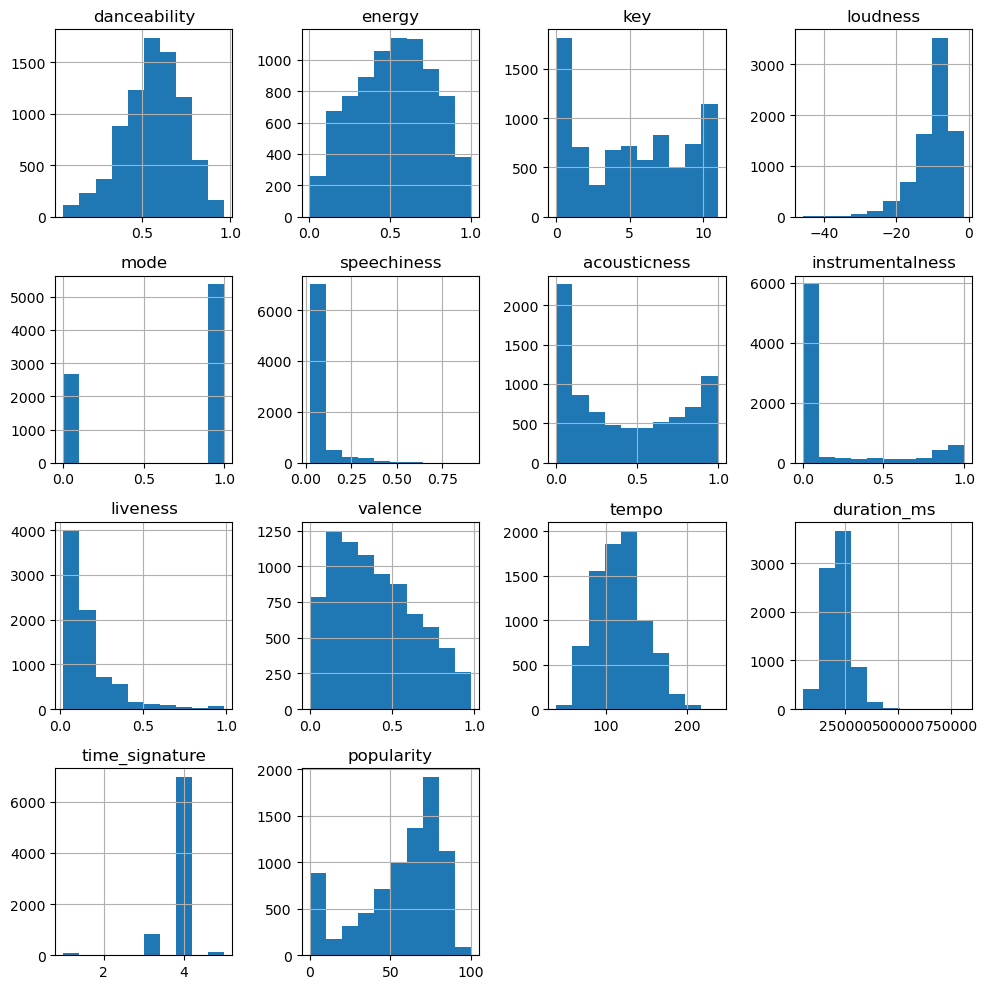

C:\Users\graha\AppData\Local\Temp\ipykernel_5840\1884814725.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = playlist_data.corr()


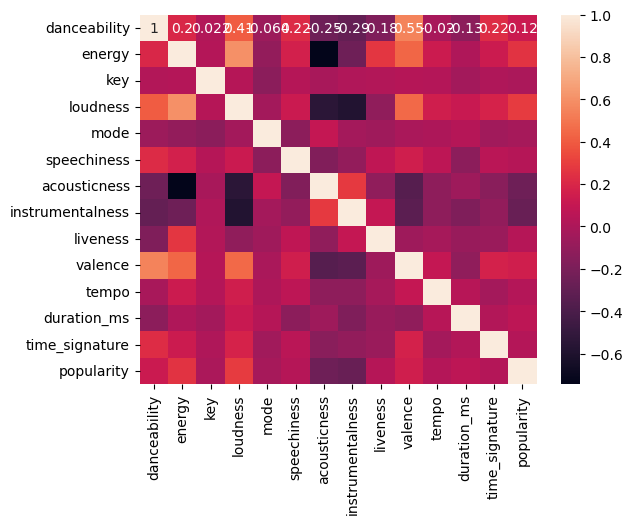

In [33]:
# Histograms for each numeric column
playlist_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
corr = playlist_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

#### 

## Transforming the data (now automated)

#### Creating precipitation flag

In [67]:
# Create a new column 'is_precipitation' that is True if the event is 'Rain', 'Snow', 'Storm', or 'Drizzle'
playlist_data.loc[:, 'is_precipitation'] = playlist_data['event'].isin(['Rain', 'Snow', 'Storm', 'Drizzle'])

# Fill NaN values with 0
playlist_data['is_precipitation'] = playlist_data['is_precipitation'].fillna(0)

# Convert the boolean values to integers (True becomes 1, False becomes 0)
playlist_data.loc[:, 'is_precipitation'] = playlist_data['is_precipitation'].astype(int)
playlist_data['is_precipitation'].value_counts()


0    4756
1    3260
Name: is_precipitation, dtype: int64

#### Removing very long and short songs

In [68]:
# Calculate Q1, Q3, and IQR
Q1 = playlist_data['duration_ms'].quantile(0.25)
Q3 = playlist_data['duration_ms'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame that contains only the outliers
outliers = playlist_data[(playlist_data['duration_ms'] < lower_bound) | (playlist_data['duration_ms'] > upper_bound)]

# Drop the outliers from the original DataFrame
playlist_data = playlist_data[(playlist_data['duration_ms'] >= lower_bound) & (playlist_data['duration_ms'] <= upper_bound)]

In [69]:
playlist_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'song', 'track_id', 'artist', 'event',
       'type', 'popularity', 'is_precipitation'],
      dtype='object')

In [70]:
outliers.shape

(230, 20)

#### Create scoring mechanism

Text(0.5, 1.0, 'Distribution of Scores')

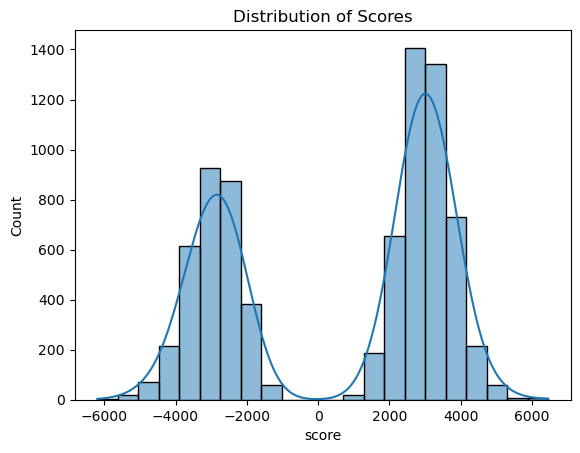

In [71]:
playlist_data['base_score'] = playlist_data['duration_ms'] / playlist_data['tempo']

playlist_data['best'] = (playlist_data['energy'] / 0.001) + (playlist_data['valence'] / 0.001)
playlist_data['good'] = abs((playlist_data['danceability'] / 0.01) + (playlist_data['energy'] / 0.01))
playlist_data['bad'] = -1 * ((playlist_data['acousticness'] / 0.01) + (playlist_data['liveness'] / 0.01))

# Calculate the score, subtracting 'is_precipitation'
playlist_data['score'] = playlist_data['base_score'] + playlist_data['best'] + playlist_data['good'] - playlist_data['bad']

# If 'is_precipitation' is 1, multiply the score by -1
playlist_data.loc[playlist_data['is_precipitation'] == 1, 'score'] *= -1

playlist_data['score'] = playlist_data['score'].astype(float)

playlist_data.drop(columns=['base_score', 'best', 'good', 'bad'], inplace=True)

# Plot the histogram of scores
sns.histplot(playlist_data['score'], kde=True)
plt.title(f"Distribution of Scores")

#### Current column selection

In [88]:
# Select only numerical columns
numerical_cols = playlist_data.select_dtypes(include=[np.number])

# Select only non-numerical columns
non_numerical_cols = playlist_data.select_dtypes(exclude=[np.number])

numerical_cols

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,is_precipitation,score
0,0.571,0.544,6,-10.613,1,0.0299,0.453000,0.00805,0.3220,0.2160,132.052,132631,4,87,1,-1953.384636
1,0.508,0.792,0,-7.311,0,0.0297,0.229000,0.12400,0.1450,0.6010,147.067,320467,4,79,1,-3739.454445
2,0.901,0.136,8,-16.127,0,0.1020,0.667000,0.35400,0.1090,0.6430,150.076,211140,4,83,1,-2367.187177
3,0.612,0.807,10,-2.810,1,0.0336,0.049500,0.01770,0.1010,0.3980,124.053,240400,4,91,1,-3299.831389
4,0.669,0.613,4,-11.120,0,0.0360,0.487000,0.17600,0.1320,0.5660,110.668,220720,4,67,1,-3363.533802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8010,0.516,0.342,4,-9.785,1,0.0342,0.832000,0.57900,0.0857,0.1670,128.378,255387,3,69,0,2675.906179
8011,0.529,0.641,2,-6.780,1,0.0336,0.071100,0.76000,0.1020,0.0890,141.931,277711,4,76,0,2820.972040
8012,0.423,0.380,0,-10.254,1,0.0262,0.002160,0.83200,0.0957,0.0432,87.029,237333,3,46,0,3240.342498
8014,0.682,0.764,10,-5.534,0,0.0500,0.000055,0.64900,0.0643,0.9360,141.213,125534,4,24,0,2740.004626


In [76]:
non_numerical_cols


,song,track_id,artist,event,type
0,d4vd,1xK59OXxi2TAAAbmZK0kBL,Romantic Homicide,Rain,Weather
1,Beach House,7H0ya83CMmgFcOhw0UB6ow,Space Song,Rain,Weather
2,Mac DeMarco,7EAMXbLcL0qXmciM5SwMh2,Heart To Heart,Rain,Weather
3,The Neighbourhood,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,Rain,Weather
4,Bon Iver,2nilAlGEZmwyaLTMMyDdLo,For Emma,Rain,Weather
...,...,...,...,...,...
8010,Radiohead,35YyxFpE0ZTOoqFx5bADW8,Nude,Winter,Season
8011,Clams Casino,0FVuyC9RP5MACjp4lgU3qZ,I'm God,Winter,Season
8012,Deftones,27gb40S6AIpP5lrhLxlfXj,Anniversary of an Uninteresting Event,Winter,Season
8014,siouxxie sixxsta,0eBYSImMbB5jCoXzfhLCs2,ketamine,Winter,Season


### Value transformations

In [90]:
# Get the list of numerical columns
numerical_cols = numerical_cols.columns.tolist()

# Initialize the transformers
scaler = StandardScaler()
power_transformer = PowerTransformer()
quantile_transformer = QuantileTransformer()

standardized_data = pd.DataFrame(data = playlist_data)

# Calculate skewness of each numerical column
skewness = playlist_data[numerical_cols].apply(lambda x: skew(x.dropna()))

# Convert skewness values to boolean values by comparing with threshold
skewness_bool = abs(skewness) > 0.5

# Ensure that skewness and skewness_bool have the same index
skewness_bool.index = skewness.index

# Filter out columns with skewness greater than a threshold (e.g., 0.5)
highly_skewed_columns = skewness[skewness_bool].index

# Apply StandardScaler, PowerTransformer, and QuantileTransformer to highly skewed columns
for column in highly_skewed_columns:
    standardized_data[column + "_st_scale"] = scaler.fit_transform(playlist_data[[column]])
    standardized_data[column + "_power_transform"] = power_transformer.fit_transform(playlist_data[[column]])
    standardized_data[column + "_quantile_transform"] = quantile_transformer.fit_transform(playlist_data[[column]])

# Show an example of a record with scaling applied
standardized_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,instrumentalness_quantile_transform,liveness_st_scale,liveness_power_transform,liveness_quantile_transform,time_signature_st_scale,time_signature_power_transform,time_signature_quantile_transform,popularity_st_scale,popularity_power_transform,popularity_quantile_transform
0,0.571,0.544,6,-10.613,1,0.0299,0.4530,0.00805,0.322,0.216,...,0.655656,1.007215,1.524077,0.877377,0.269454,0.200091,0.54955,1.211595,1.270254,0.973974
1,0.508,0.792,0,-7.311,0,0.0297,0.2290,0.12400,0.145,0.601,...,0.752753,-0.205233,0.176768,0.657157,0.269454,0.200091,0.54955,0.902120,0.929290,0.836837
2,0.901,0.136,8,-16.127,0,0.1020,0.6670,0.35400,0.109,0.643,...,0.799800,-0.451832,-0.430909,0.397397,0.269454,0.200091,0.54955,1.056857,1.099275,0.918418
3,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.01770,0.101,0.398,...,0.681181,-0.506632,-0.593915,0.277778,0.269454,0.200091,0.54955,1.366332,1.442189,0.993994
4,0.669,0.613,4,-11.120,0,0.0360,0.4870,0.17600,0.132,0.566,...,0.766767,-0.294282,-0.021192,0.608609,0.269454,0.200091,0.54955,0.437909,0.425766,0.563564


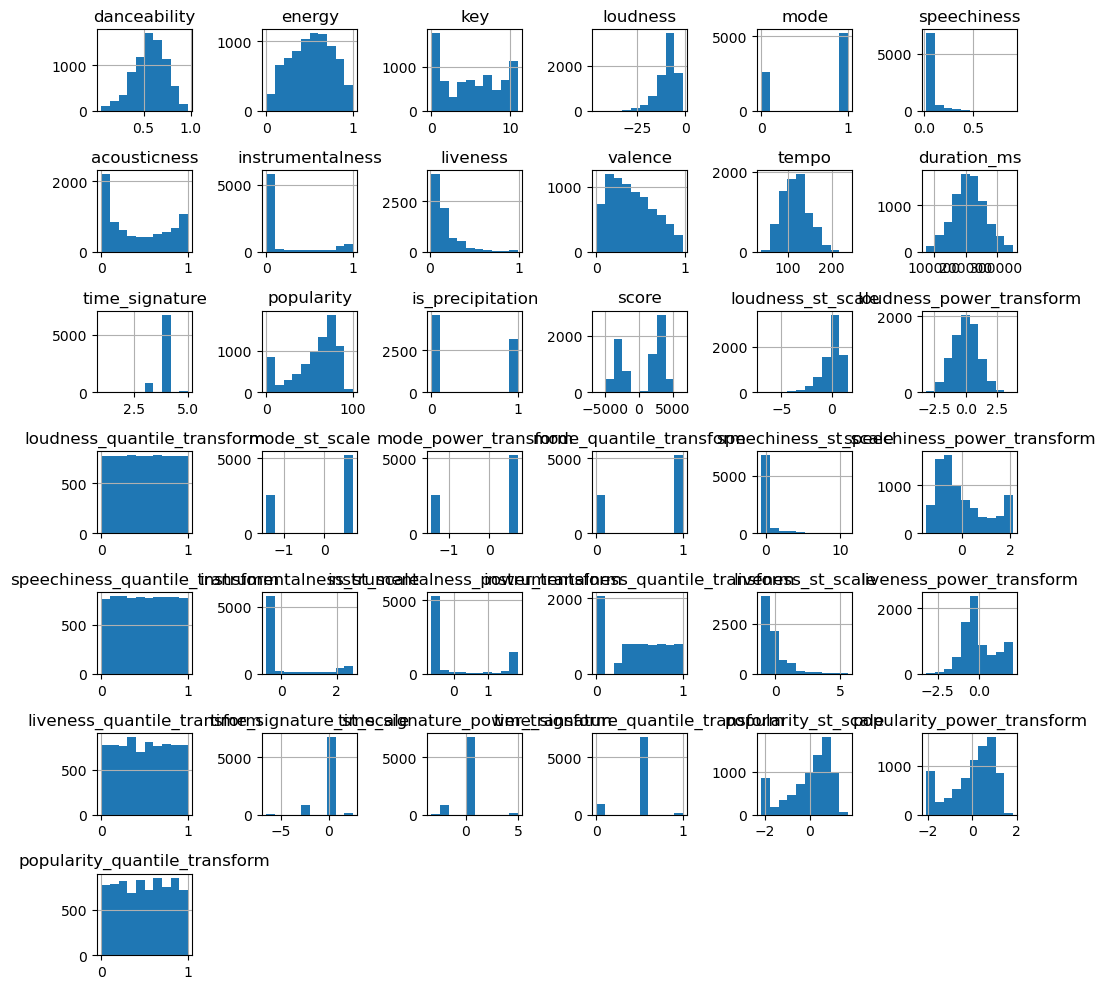

C:\Users\graha\AppData\Local\Temp\ipykernel_5840\1814753636.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = standardized_data.corr()


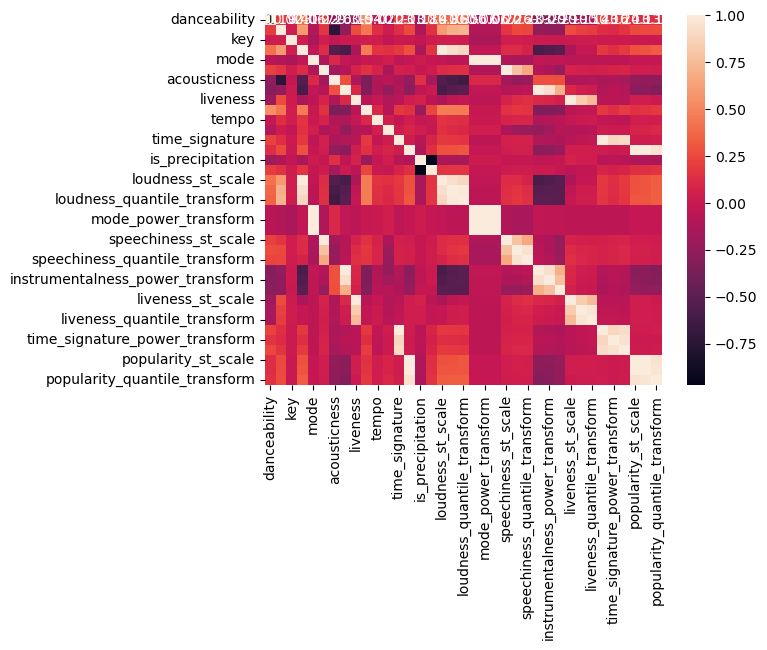

In [91]:
# Histograms for each numeric column
standardized_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
corr = standardized_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

### Determine best transformations

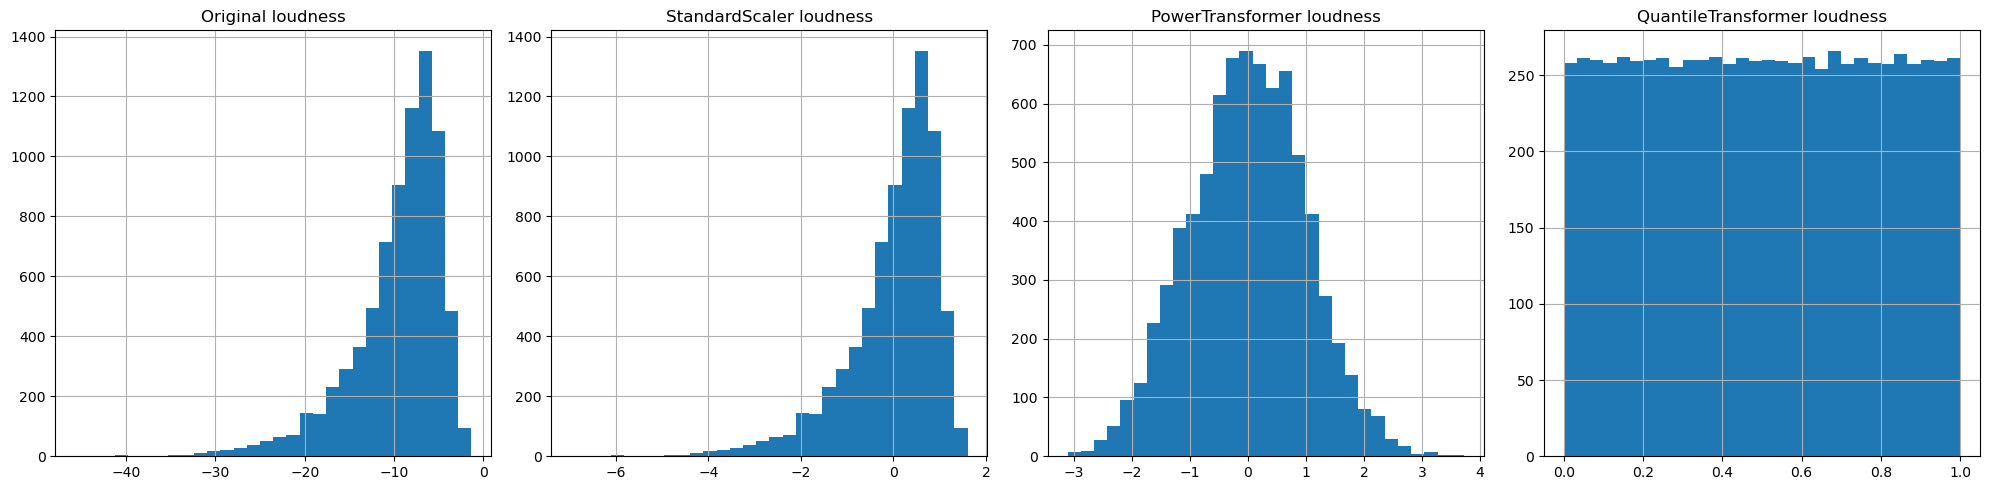

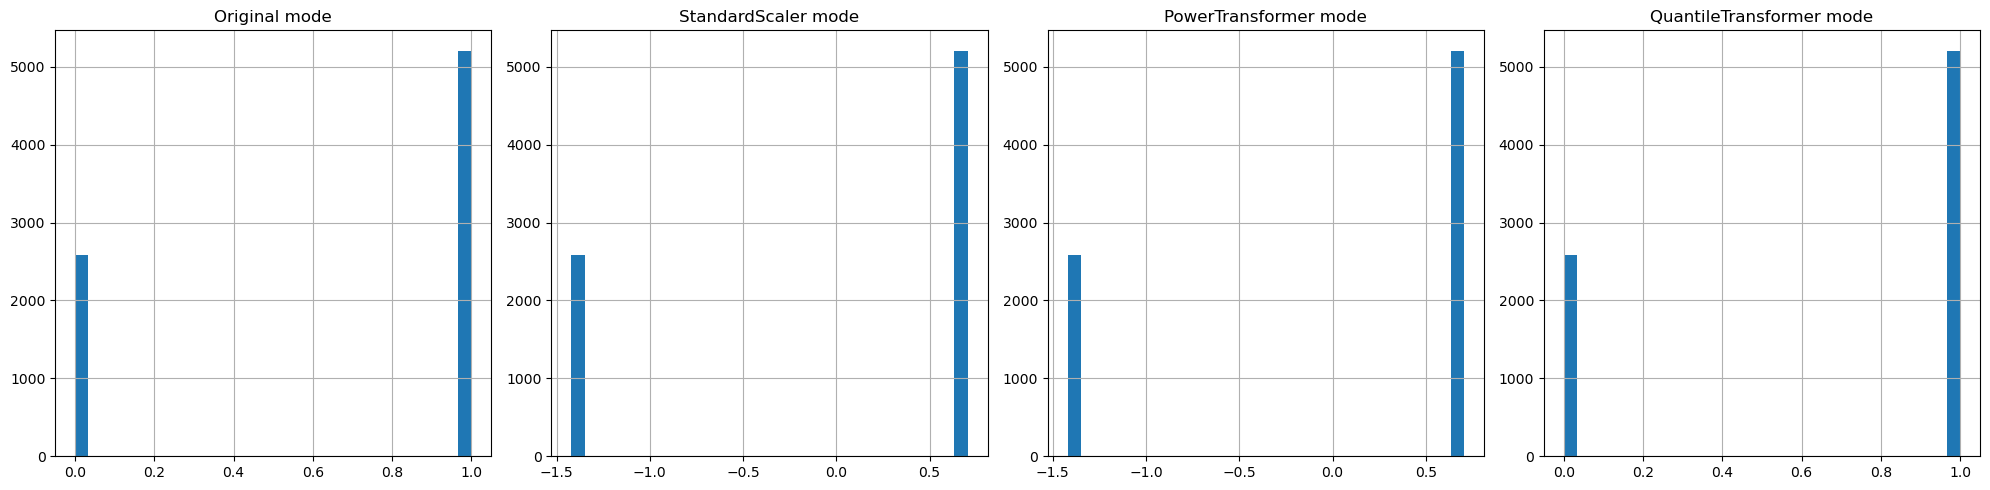

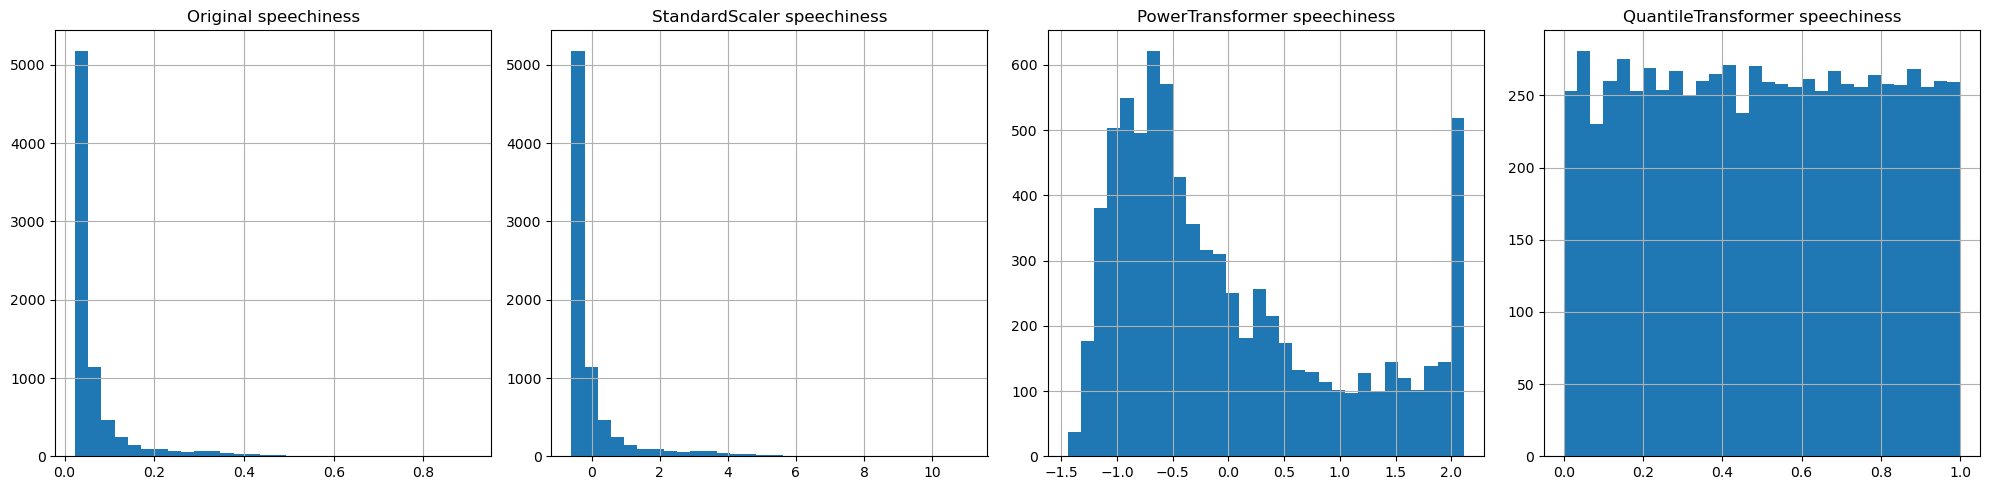

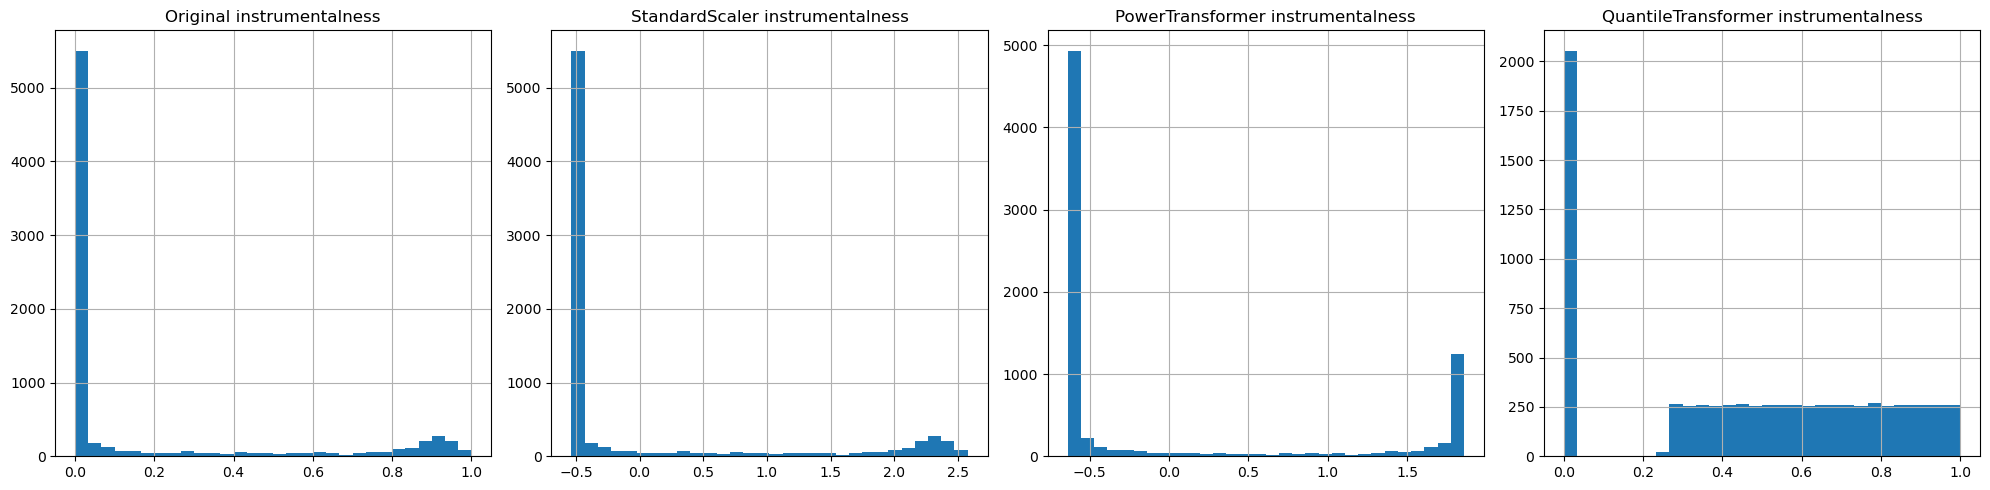

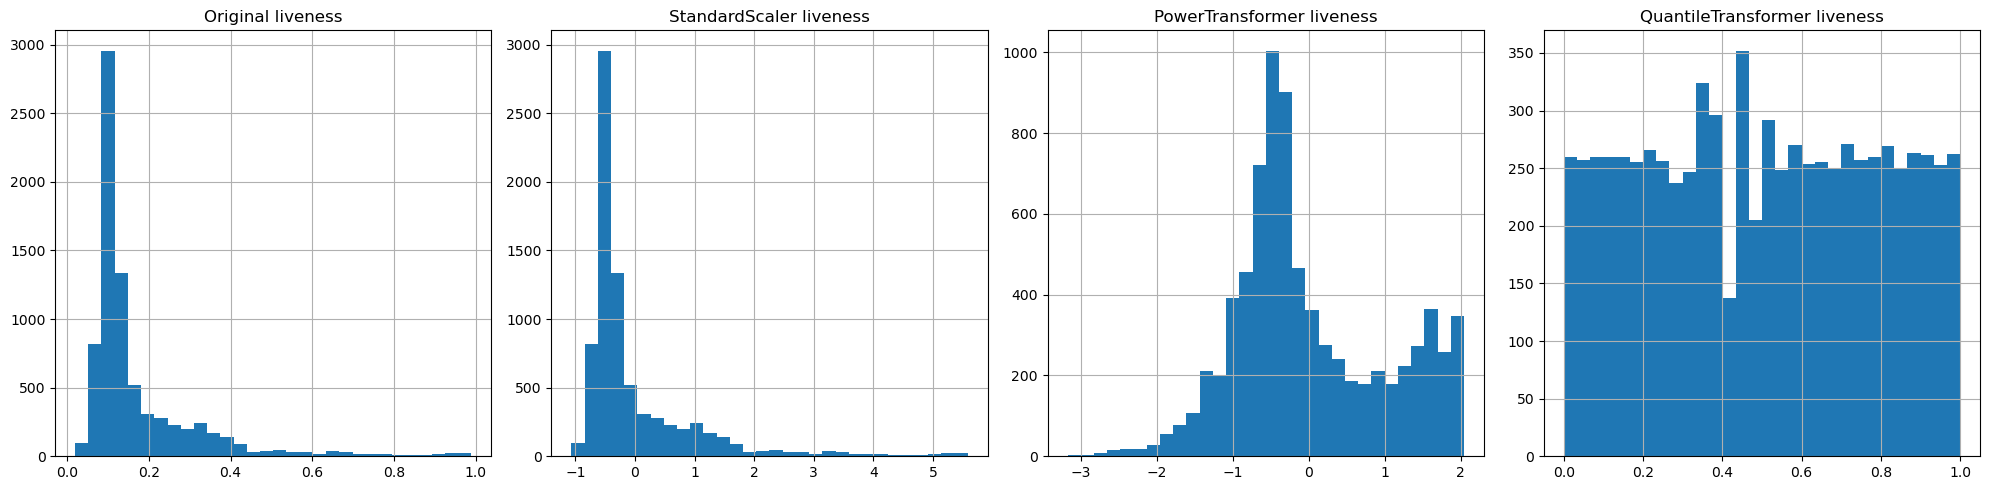

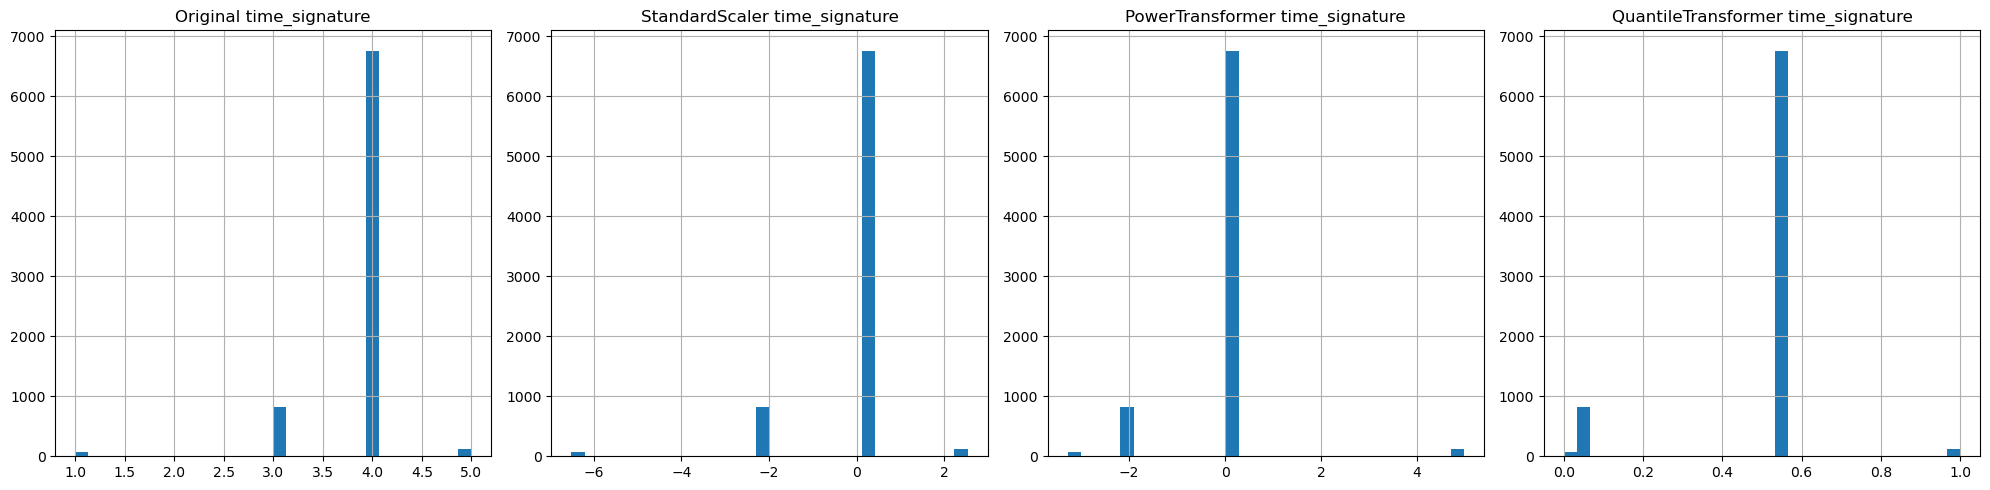

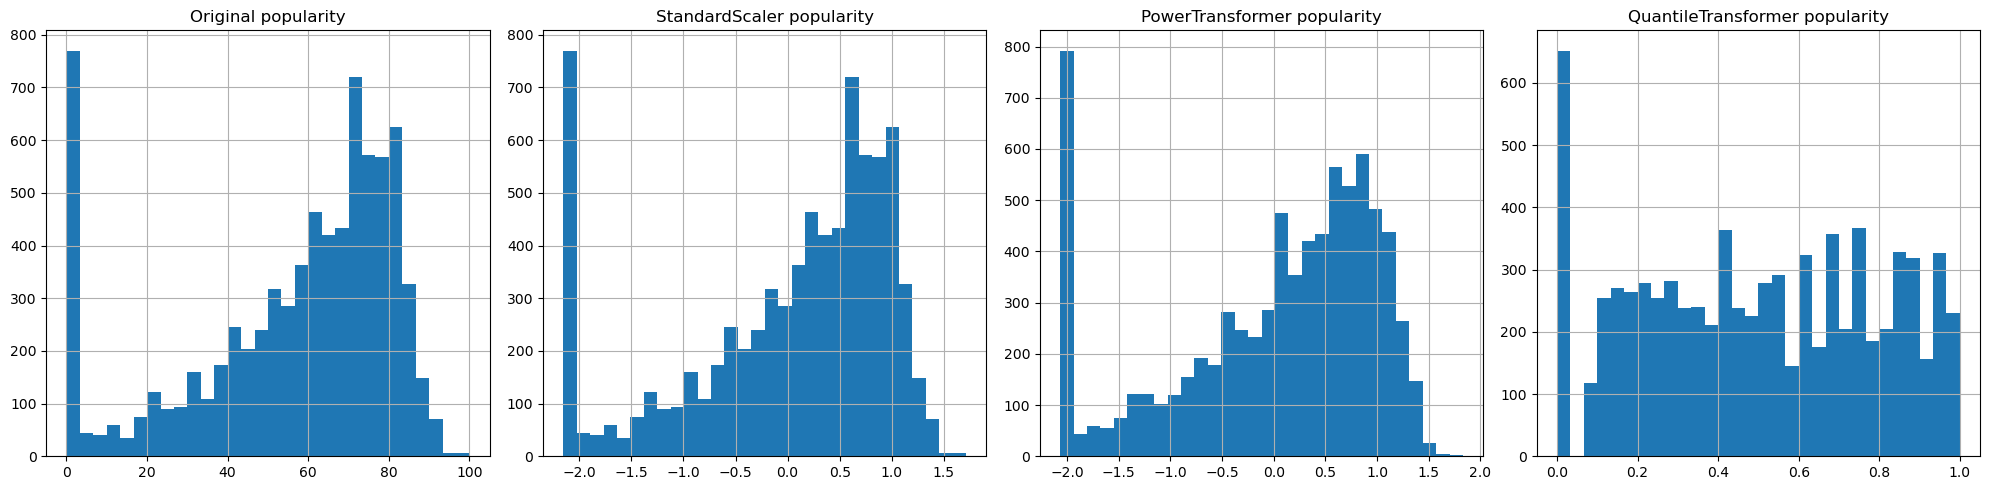

In [92]:
# Assuming highly_skewed_columns is your list of highly skewed columns
for column in highly_skewed_columns:
    plt.figure(figsize=(20,5))

    # Plot histogram for original column
    plt.subplot(141)
    standardized_data[column].hist(bins=30)
    plt.title(f'Original {column}')

    # Plot histogram for StandardScaler transformed column
    plt.subplot(142)
    standardized_data[column + "_st_scale"].hist(bins=30)
    plt.title(f'StandardScaler {column}')

    # Plot histogram for PowerTransformer transformed column
    plt.subplot(143)
    standardized_data[column + "_power_transform"].hist(bins=30)
    plt.title(f'PowerTransformer {column}')

    # Plot histogram for QuantileTransformer transformed column
    plt.subplot(144)
    standardized_data[column + "_quantile_transform"].hist(bins=30)
    plt.title(f'QuantileTransformer {column}')

    plt.tight_layout()
    plt.show()

In [93]:

best_transformations = {}

# Assuming highly_skewed_columns is your list of highly skewed columns
for column in highly_skewed_columns:
    transformations = {
        "original": standardized_data[column],
        "st_scale": standardized_data[column + "_st_scale"],
        "power_transform": standardized_data[column + "_power_transform"],
        "quantile_transform": standardized_data[column + "_quantile_transform"]
    }

    # Calculate skewness for each transformation and find the one with smallest skewness
    best_transform = min(transformations, key=lambda x: abs(skew(transformations[x])))
    best_transformations[column] = best_transform

seen = set()
best_transformations_no_duplicates = {}

for column, transform in best_transformations.items():
    if transform not in seen:
        best_transformations_no_duplicates[column] = transform
        seen.add(transform)

best_transformations_no_duplicates


{'loudness': 'quantile_transform',
 'mode': 'original',
 'time_signature': 'power_transform'}

In [94]:
best_transformations = {}

# Assuming highly_skewed_columns is your list of highly skewed columns
for column in highly_skewed_columns:
    transformations = {
        "original": standardized_data[column],
        "st_scale": standardized_data[column + "_st_scale"],
        "power_transform": standardized_data[column + "_power_transform"],
        "quantile_transform": standardized_data[column + "_quantile_transform"]
    }

    # Calculate skewness for each transformation and find the one with smallest skewness
    best_transform = min(transformations, key=lambda x: abs(skew(transformations[x])))
    best_transformations[column] = best_transform

seen = set()
best_transformations_no_duplicates = {}

for column, transform in best_transformations.items():
    if transform not in seen:
        best_transformations_no_duplicates[column] = transform
        seen.add(transform)

best_transformations_no_duplicates

# Replace column names in base_columns with their best transformations if necessary
for i, column in enumerate(numerical_cols):
    if column in best_transformations and best_transformations[column] != 'original':
        numerical_cols[i] = column + '_' + best_transformations[column]

# Select the columns from standardized_data
selected_data = standardized_data[numerical_cols]

# Drop the base columns from playlist_data
playlist_data = playlist_data.drop(columns=numerical_cols, errors='ignore')

# Concatenate playlist_data with selected_data
playlist_data = pd.concat([playlist_data, selected_data], axis=1)
playlist_data

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,mode,speechiness_quantile_transform,acousticness,instrumentalness_quantile_transform,liveness_quantile_transform,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform
0,-10.613,0.0299,0.00805,0.3220,4,d4vd,1xK59OXxi2TAAAbmZK0kBL,Romantic Homicide,Rain,Weather,...,1,0.147147,0.453000,0.655656,0.877377,0.2160,132.052,132631,0.200091,0.973974
1,-7.311,0.0297,0.12400,0.1450,4,Beach House,7H0ya83CMmgFcOhw0UB6ow,Space Song,Rain,Weather,...,0,0.138639,0.229000,0.752753,0.657157,0.6010,147.067,320467,0.200091,0.836837
2,-16.127,0.1020,0.35400,0.1090,4,Mac DeMarco,7EAMXbLcL0qXmciM5SwMh2,Heart To Heart,Rain,Weather,...,0,0.854855,0.667000,0.799800,0.397397,0.6430,150.076,211140,0.200091,0.918418
3,-2.810,0.0336,0.01770,0.1010,4,The Neighbourhood,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,Rain,Weather,...,1,0.282783,0.049500,0.681181,0.277778,0.3980,124.053,240400,0.200091,0.993994
4,-11.120,0.0360,0.17600,0.1320,4,Bon Iver,2nilAlGEZmwyaLTMMyDdLo,For Emma,Rain,Weather,...,0,0.376376,0.487000,0.766767,0.608609,0.5660,110.668,220720,0.200091,0.563564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8010,-9.785,0.0342,0.57900,0.0857,3,Radiohead,35YyxFpE0ZTOoqFx5bADW8,Nude,Winter,Season,...,1,0.305806,0.832000,0.835843,0.138639,0.1670,128.378,255387,-2.090626,0.600100
8011,-6.780,0.0336,0.76000,0.1020,4,Clams Casino,0FVuyC9RP5MACjp4lgU3qZ,I'm God,Winter,Season,...,1,0.282783,0.071100,0.864669,0.290290,0.0890,141.931,277711,0.200091,0.762262
8012,-10.254,0.0262,0.83200,0.0957,3,Deftones,27gb40S6AIpP5lrhLxlfXj,Anniversary of an Uninteresting Event,Winter,Season,...,1,0.022523,0.002160,0.885425,0.220220,0.0432,87.029,237333,-2.090626,0.281281
8014,-5.534,0.0500,0.64900,0.0643,4,siouxxie sixxsta,0eBYSImMbB5jCoXzfhLCs2,ketamine,Winter,Season,...,0,0.643644,0.000055,0.848582,0.036267,0.9360,141.213,125534,0.200091,0.149650


In [95]:
complete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
loudness,7786.0,-9.643820e+00,5.180146,-45.726000,-11.770250,-8.379500,-6.032000,-1.333000
speechiness,7786.0,6.849544e-02,0.075921,0.023200,0.032800,0.040500,0.063000,0.907000
instrumentalness,7786.0,1.724810e-01,0.321093,0.000000,0.000000,0.000239,0.115000,1.000000
liveness,7786.0,1.749610e-01,0.145995,0.018700,0.098200,0.116000,0.191000,0.990000
time_signature,7786.0,3.880812e+00,0.442361,1.000000,4.000000,4.000000,4.000000,5.000000
popularity,7786.0,5.567994e+01,25.851943,0.000000,42.000000,64.000000,76.000000,100.000000
is_precipitation,7786.0,4.054714e-01,0.491015,0.000000,0.000000,0.000000,1.000000,1.000000
score,7786.0,6.172036e+02,3030.996522,-6194.238274,-2684.413300,2364.822386,3173.271729,6454.917164
loudness_st_scale,7786.0,1.606159e-16,1.000064,-6.965923,-0.410523,0.244086,0.697288,1.604463
danceability,7786.0,5.645450e-01,0.170309,0.053500,0.455000,0.574000,0.685000,0.967000


In [96]:
weather_music = complete_data[complete_data['type'] == 'Weather']
season_music = complete_data[complete_data['type'] == 'Season']


In [97]:
season_music['event'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [98]:
print(season_music.columns)

Index(['loudness', 'speechiness', 'instrumentalness', 'liveness',
       'time_signature', 'song', 'track_id', 'artist', 'event', 'type',
       'popularity', 'is_precipitation', 'score', 'loudness_st_scale',
       'danceability', 'energy', 'key', 'loudness_quantile_transform', 'mode',
       'speechiness_quantile_transform', 'acousticness',
       'instrumentalness_quantile_transform', 'liveness_quantile_transform',
       'valence', 'tempo', 'duration_ms', 'time_signature_power_transform',
       'popularity_quantile_transform'],
      dtype='object')


In [49]:
# weather_music.groupby('event')['score'].describe()

In [99]:
print(complete_data.shape)
print(weather_music.shape)
print(season_music.shape)

(7786, 28)
(4715, 28)
(3071, 28)


In [100]:
weather_music.groupby('event').describe().T

event                                     Cloud     Drizzle        Rain  \
loudness                      count  775.000000  871.000000  706.000000   
                              mean   -12.151523   -8.874445  -14.119433   
                              std      6.048170    4.906651    7.960448   
                              min    -33.878000  -39.627000  -45.726000   
                              25%    -16.176000  -10.826000  -18.786250   
...                                         ...         ...         ...   
popularity_quantile_transform min      0.000000    0.000000    0.000000   
                              25%      0.134134    0.235986    0.215716   
                              50%      0.247748    0.446947    0.386887   
                              75%      0.644144    0.691692    0.600100   
                              max      0.999482    0.997998    0.993994   

event                                      Snow       Storm         Sun  
loudness                      count  833.000000  747.000000  783.000000  
                              mean   -10.111585   -9.491905   -8.546725  
                              std      4.239689    3.752308    4.290367  
                              min    -28.603000  -24.639000  -21.674000  
                              25%    -12.478000  -11.535000  -10.329000  
...                                         ...         ...         ...  
popularity_quantile_transform min      0.000000    0.000000    0.000000  
                              25%      0.153654    0.263764    0.254755  
                              50%      0.386887    0.509009    0.462462  
                              75%      0.644144    0.762262    0.714715  
                              max      0.993994    0.996496    0.993994  

[184 rows x 6 columns]

In [101]:
weather_music.groupby('event').mean().T

C:\Users\graha\AppData\Local\Temp\ipykernel_5840\91944252.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_music.groupby('event').mean().T


event,Cloud,Drizzle,Rain,Snow,Storm,Sun
loudness,-12.151523,-8.874445,-14.119433,-10.111585,-9.491905,-8.546725
speechiness,0.050419,0.070283,0.080717,0.048108,0.073557,0.077365
instrumentalness,0.438004,0.067757,0.379584,0.094839,0.115211,0.122480
liveness,0.155519,0.160236,0.287942,0.151834,0.157148,0.173574
time_signature,3.845161,3.886338,3.786119,3.841537,3.836680,3.945083
popularity,43.891613,54.045924,50.956091,46.944778,56.050870,54.581098
is_precipitation,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
score,2766.002708,-3000.409575,-2855.668617,-2988.082028,-2920.125571,3162.474744
loudness_st_scale,-0.484130,0.148533,-0.864049,-0.090305,0.029328,0.211802
danceability,0.502236,0.573668,0.478607,0.529205,0.516036,0.629143


In [53]:


# Assuming 'score' is your target variable
X = numerical_cols.drop('score', axis=1).values
Y = numerical_cols['score'].values

# Feature extraction
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False False False False  True False False  True False False
 False  True False False False False False False False False]
Feature Ranking: [14  3  4 13 12 17  1 18 10  1 19  5  8  1  2 16  7  9 15 20 11  6]


In [54]:
# Check the unique values in the last column of the DataFrame
print(weather_music.iloc[:,-1].unique())

# Check the shape of the DataFrame
print(weather_music.shape)

[-1953.38463636 -3739.45444457 -2367.18717716 ... -2749.37815939
 -1680.66771918 -2376.12279777]
(4715, 28)


In [55]:
import scipy.stats as stats

# Assuming weather_music is a DataFrame and 'event' is a categorical variable
numerical_cols = weather_music.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    groups = [group[column].values for name, group in weather_music.groupby('event')]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"For column '{column}':")
    print('F value:', f_val)
    print('p-value:', p_val)
    print()

For column 'loudness':
F value: 123.39637245993997
p-value: 4.3154244825475136e-123

For column 'speechiness':
F value: 29.58175975645468
p-value: 1.1088845011821571e-29

For column 'instrumentalness':
F value: 209.5928501467807
p-value: 2.2959279313364084e-202

For column 'liveness':
F value: 89.15222014713265
p-value: 7.217794885101595e-90

For column 'time_signature':
F value: 9.504696791038544
p-value: 4.934263120669862e-09

For column 'popularity':
F value: 25.79744409003716
p-value: 8.932299011932096e-26

For column 'loudness_st_scale':
F value: 123.39637245993995
p-value: 4.3154244825475136e-123

For column 'danceability':
F value: 83.01008866514985
p-value: 8.438833903716011e-84

For column 'energy':
F value: 57.24620001544682
p-value: 5.468115888117923e-58

For column 'key':
F value: 1.292326293951463
p-value: 0.26405885280904345

For column 'loudness_quantile_transform':
F value: 92.77474360305945
p-value: 1.9736156690350056e-93

For column 'mode':
F value: 14.502725506739866

## Visualizing the data

Text(0.5, 1.02, 'Distribution of Danceability for Weather Playlists')

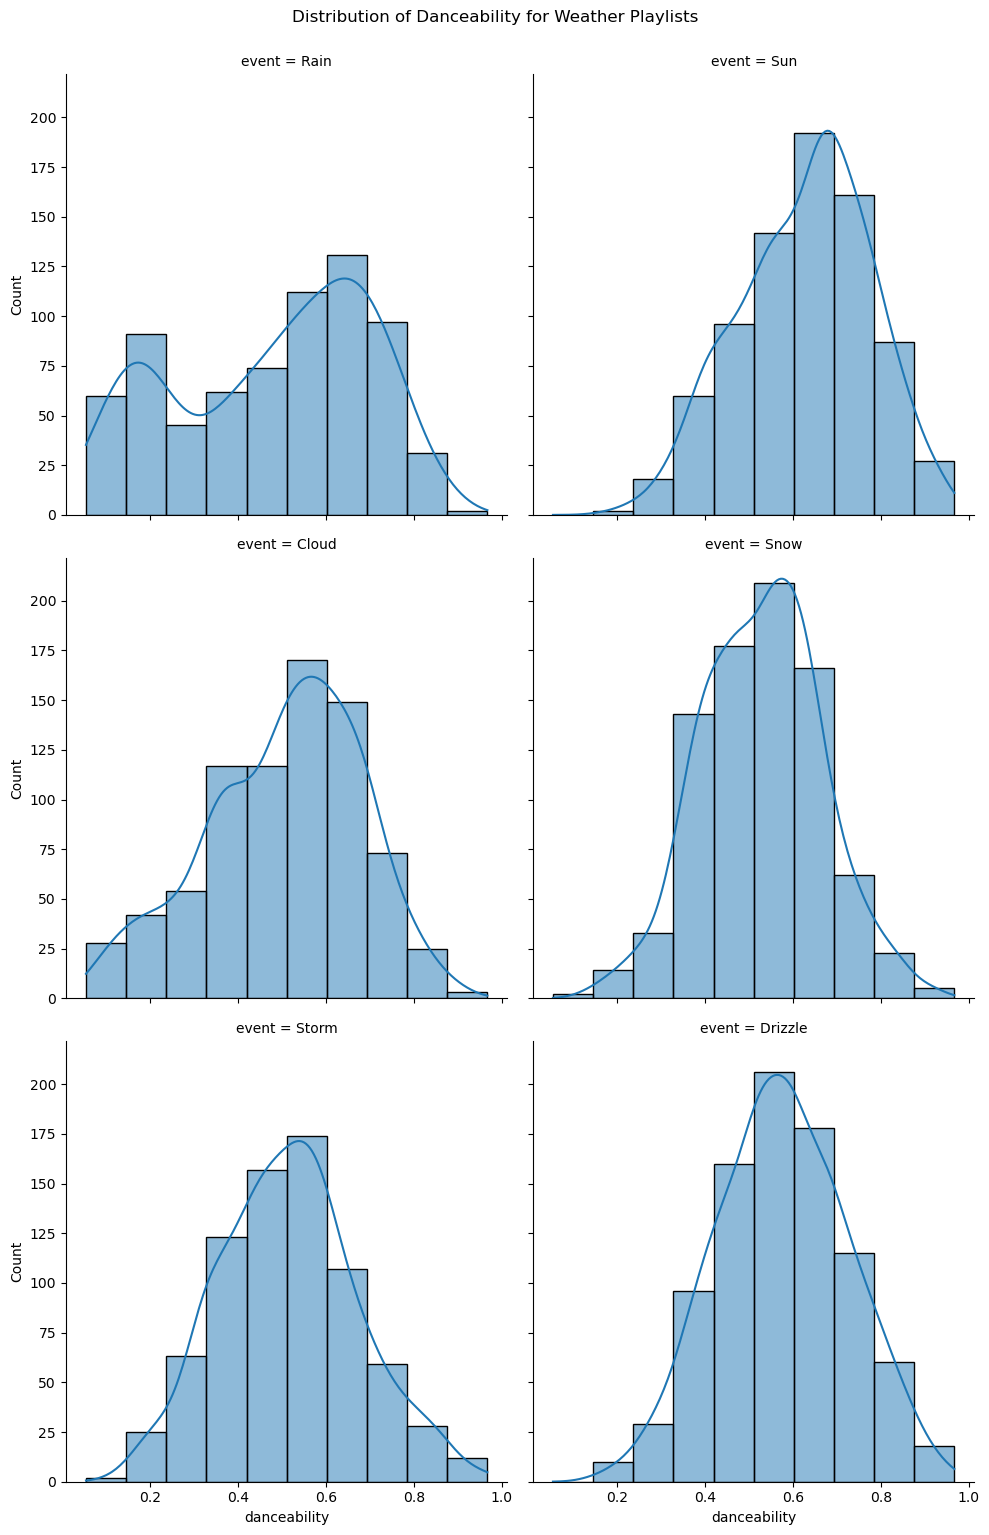

In [36]:
# Plot the distribution of 'danceability' for weather playlists
g = sns.displot(data=weather_music, x='danceability', col='event', kde=True, bins=10, col_wrap=2)
g.fig.suptitle('Distribution of Danceability for Weather Playlists', y=1.02)

In [1]:
columns = season_music.columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        sns.pairplot(season_music[[columns[i], columns[j]]], hue='event')
        plt.show()

NameError: name 'season_music' is not defined

In [177]:
sns.pairplot(season_music, hue='event')

KeyboardInterrupt: 

## Transforming and Normalizing Data

In [38]:
le = LabelEncoder()

season_music['season_num'] = le.fit_transform(season_music['event'])
season_music

C:\Users\graha\AppData\Local\Temp\ipykernel_38176\3520405954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_music['season_num'] = le.fit_transform(season_music['event'])


,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,speechiness_quantile_transform,acousticness,instrumentalness_quantile_transform,liveness_quantile_transform,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,season_num
4855,-5.505,0.0412,0.000809,0.0398,4,Hozier,5Z0UnEtpLDQyYlWwgi8m9C,Too Sweet,Spring,Season,...,0.509009,0.029500,0.551552,0.005005,0.9340,117.038,251424,0.195693,0.993994,1
4856,-5.213,0.0287,0.000013,0.0898,4,Declan McKenna,4sNG6zQBmtq7M8aeeKJRMQ,Brazil,Spring,Season,...,0.101602,0.094100,0.367868,0.163664,0.6650,121.079,252307,0.195693,0.914915,1
4857,-4.613,0.0299,0.000000,0.0855,4,Edison Lighthouse,5Ts1DYOuouQLgzTaisxWYh,Love Grows (Where My Rosemary Goes),Spring,Season,...,0.146647,0.403000,0.000000,0.134635,0.7530,108.625,174760,0.195693,0.711712,1
4858,-6.510,0.0315,0.002630,0.2970,4,Troye Sivan,31MNHKE86sEXzIglbGQ6mu,Got Me Started,Spring,Season,...,0.203704,0.219000,0.606607,0.851852,0.5440,127.002,198448,0.195693,0.781782,1
4859,-7.282,0.1750,0.000147,0.2690,4,Jungle,19kHhX6f6EfLU7rcO3RqjO,Back On 74,Spring,Season,...,0.926426,0.207000,0.478478,0.833834,0.1940,146.003,209483,0.195693,0.959960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,-9.785,0.0342,0.579000,0.0857,3,Radiohead,35YyxFpE0ZTOoqFx5bADW8,Nude,Winter,Season,...,0.301301,0.832000,0.835115,0.136637,0.1670,128.378,255387,-2.086453,0.619119,3
8009,-6.780,0.0336,0.760000,0.1020,4,Clams Casino,0FVuyC9RP5MACjp4lgU3qZ,I'm God,Winter,Season,...,0.277778,0.071100,0.864544,0.288789,0.0890,141.931,277711,0.195693,0.758759,3
8010,-10.254,0.0262,0.832000,0.0957,3,Deftones,27gb40S6AIpP5lrhLxlfXj,Anniversary of an Uninteresting Event,Winter,Season,...,0.023524,0.002160,0.885886,0.218218,0.0432,87.029,237333,-2.086453,0.279279,3
8012,-5.534,0.0500,0.649000,0.0643,4,siouxxie sixxsta,0eBYSImMbB5jCoXzfhLCs2,ketamine,Winter,Season,...,0.640641,0.000055,0.847848,0.036512,0.9360,141.213,125534,0.195693,0.150651,3


In [ ]:
weather_music['event'].unique()

array(['Rain', 'Sun', 'Cloud', 'Snow', 'Storm', 'Drizzle'], dtype=object)

In [ ]:
season_music.columns

Index(['loudness', 'speechiness', 'instrumentalness', 'liveness',
       'time_signature', 'song', 'track_id', 'artist', 'event', 'type',
       'popularity', 'is_precipitation', 'loudness_st_scale', 'danceability',
       'energy', 'key', 'loudness_quantile_transform', 'mode',
       'speechiness_quantile_transform', 'acousticness',
       'instrumentalness_quantile_transform', 'liveness_quantile_transform',
       'valence', 'tempo', 'duration_ms', 'time_signature_power_transform',
       'popularity_quantile_transform', 'season_num'],
      dtype='object')

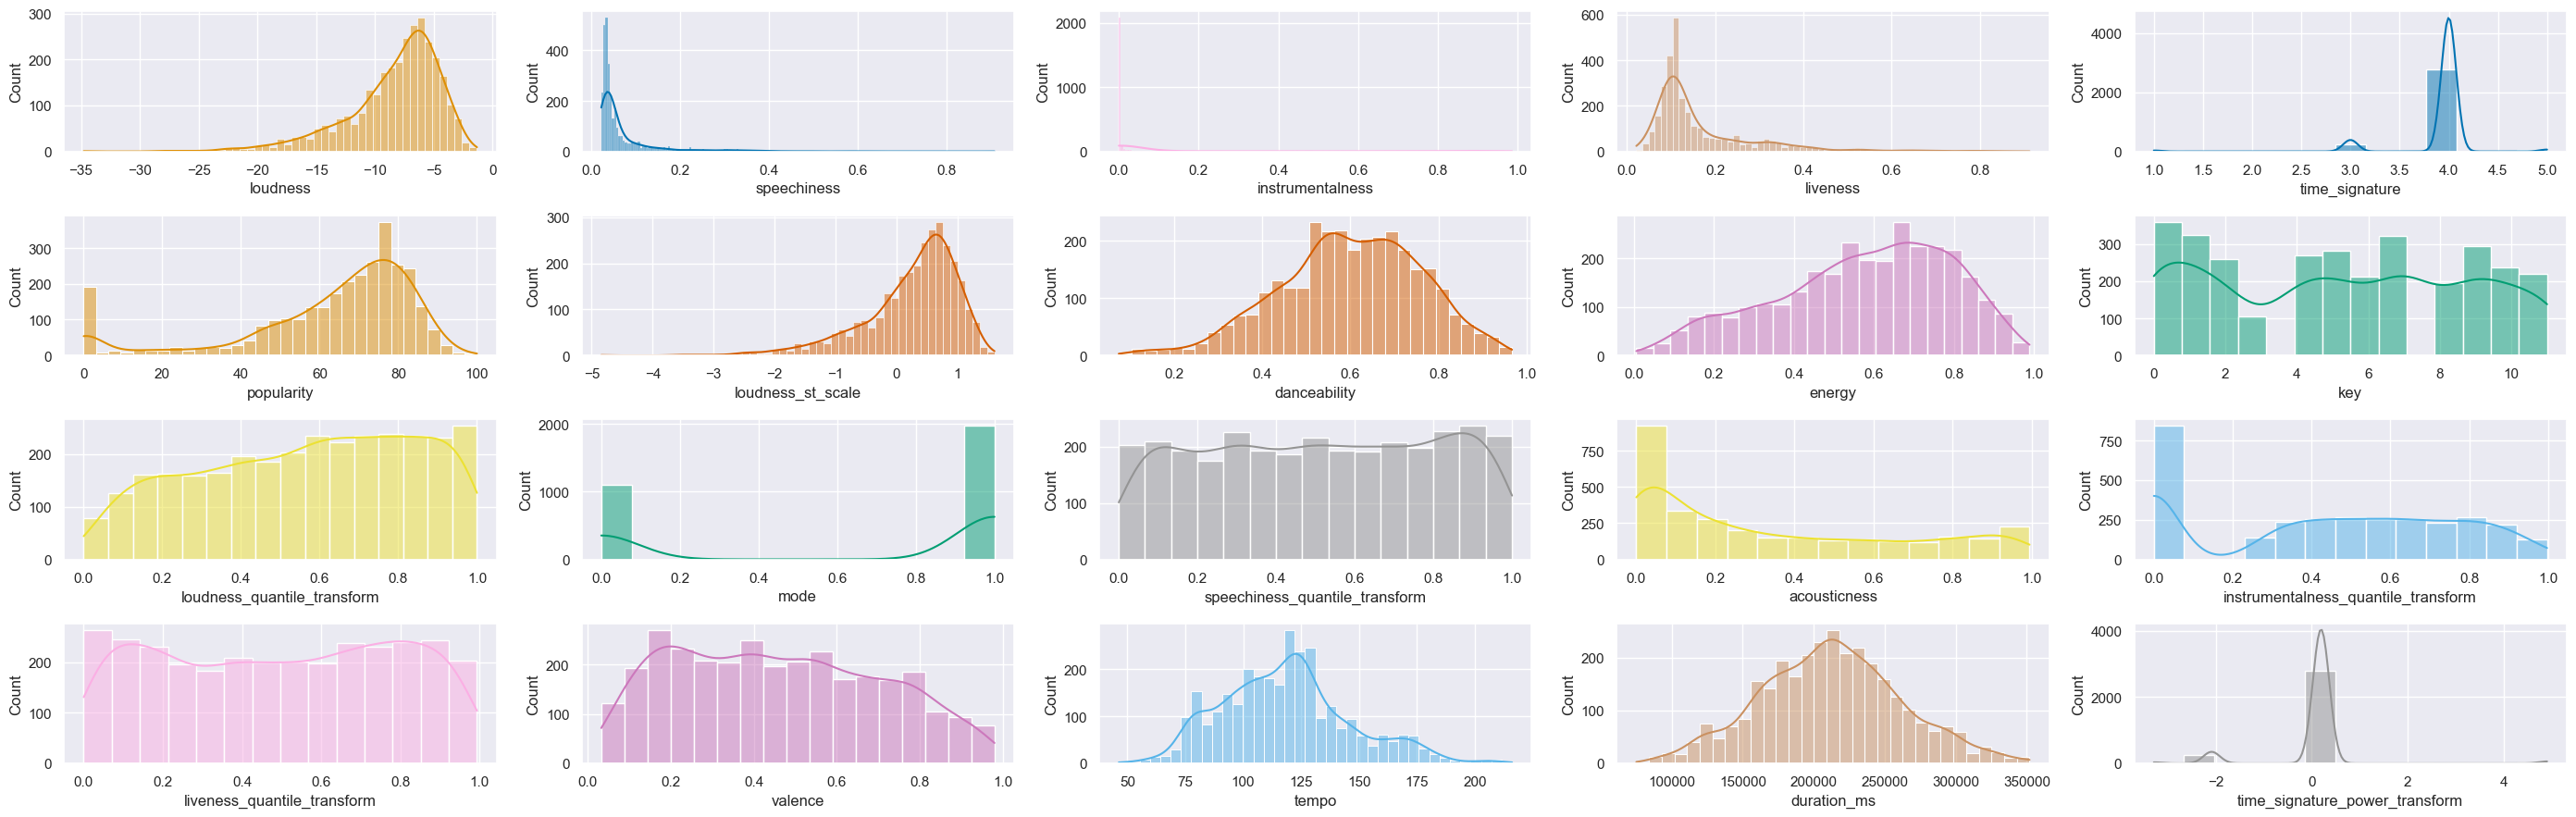

In [39]:


sns.set_theme(style="darkgrid")

# Generate a color palette with 20 colors
colors = sns.color_palette("colorblind", 20)

# Shuffle the colors
random.shuffle(colors)

fig, axs = plt.subplots(4, 6, figsize=(28, 9))

# Assuming numerical_cols is already defined
for i, col in enumerate(numerical_cols):
    row = i // 5
    col_index = i % 5
    if row > 3:  # Check if row is out of bounds
        break  # Skip the rest of the loop if row is out of bounds
    color = colors[i % len(colors)]  # Use modulo to cycle through colors
    sns.histplot(data=season_music, x=col, kde=True, color=color, ax=axs[row, col_index])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Scores')

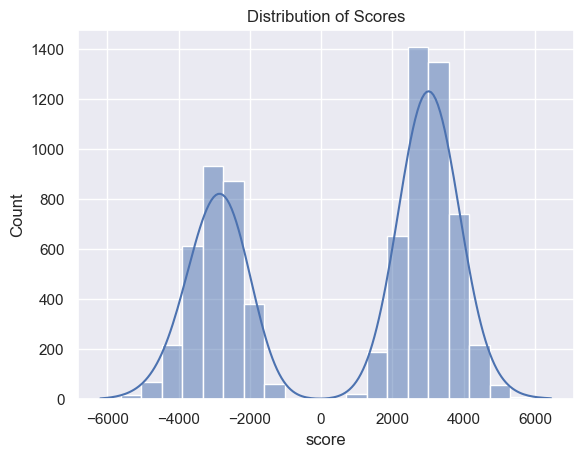

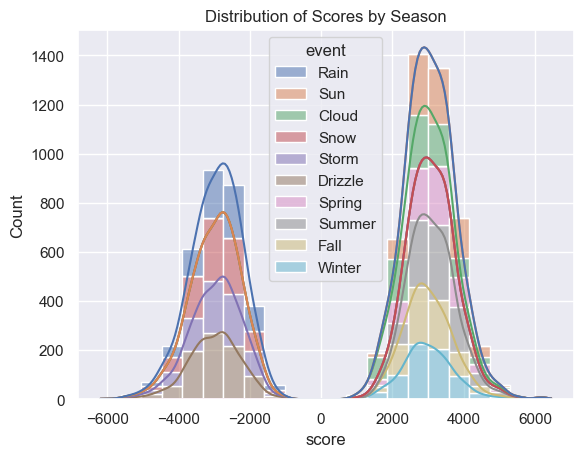

In [53]:
# Plot the histogram of scores for each season
sns.histplot(data=complete_data, x='score', hue='event', kde=True, multiple="stack")
plt.title("Distribution of Scores by Season")
plt.show()

In [54]:
pd.DataFrame(complete_data['score'].describe())

,score
count,7804.000000
mean,620.171299
std,3030.697177
min,-6194.238274
25%,-2684.892950
50%,2363.326477
75%,3174.298047
max,6454.917164


In [82]:
max_negative = complete_data[complete_data['score'] < 0]['score'].max()
min_positive = complete_data[complete_data['score'] > 0]['score'].min()
min_range = abs(max_negative - min_positive)

print('Max Negative:', max_negative)
print('Min Positive:', min_positive)
print('Min Range:', min_range)

Max Negative: -1036
Min Positive: 947
Min Range: 1983


In [87]:
def select_songs(score, range_width, data):
    lower_bound = score - range_width
    upper_bound = score + range_width
    selected_songs = data[(data['score'] >= lower_bound) & (data['score'] <= upper_bound)]
    return selected_songs

selected_songs = select_songs(0, 2000, complete_data)
selected_songs = selected_songs.drop_duplicates(subset='track_id', keep='last')
selected_songs

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,base_score,best,good,bad,score
43,-10.064,0.0763,0.00000,0.102,3,Benson Boone,6HuHyXviAdpmnQu73JHfBz,Ghost Town,Rain,Weather,...,0.1160,174.185,193733,-2.086453,0.781782,1112.225507,451.0,72.60,-49.1000,-1684
61,-25.963,0.0802,0.92600,0.748,4,Eva Poured,7MhZHbrf3xvUdUBO0NCWYJ,Perfect Rain,Rain,Weather,...,0.0564,89.485,121115,0.195693,0.428428,1353.467062,454.4,56.20,-74.8101,-1938
63,-24.552,0.0805,0.94100,0.391,3,Distantic,3g8n6JHQDGGjrE27lAtpvn,Watch The Storm,Rain,Weather,...,0.0352,131.109,153066,-2.086453,0.619119,1167.471341,577.2,70.00,-39.1453,-1853
66,-24.697,0.0759,0.94400,0.143,4,Amida Nature Sounds,00ChJJWChWCHfHDOnsnWvv,Drops And Thunder,Rain,Weather,...,0.0151,111.754,122000,0.195693,0.371371,1091.683519,751.1,89.70,-14.3554,-1946
78,-23.215,0.0987,0.85900,0.478,3,LWD Rain,48jzJCr5iHi1aMuhTKlXP0,Dark skies,Rain,Weather,...,0.0322,106.449,121115,-2.086453,0.542543,1137.774897,699.2,81.70,-49.4800,-1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,-21.707,0.0375,0.90100,0.111,4,Grouper,1nJV1JGWf61WRJy851LO34,Living Room,Winter,Season,...,0.1560,124.374,142120,0.195693,0.297798,1142.682554,231.7,50.07,-100.1000,1524
7985,-8.745,0.0361,0.00454,0.122,4,Nirvana,09aF9vhHwC187dABixAOfV,Marigold,Winter,Season,...,0.3020,176.836,152933,0.195693,0.230731,864.829560,697.0,74.60,-15.5700,1651
7988,-16.541,0.0340,0.90800,0.111,3,Team Sleep,5v0qRjzd2mdR5yzSvDV7zW,Delorian,Winter,Season,...,0.0399,80.123,94067,-2.086453,0.214214,1174.032425,209.9,62.40,-73.9000,1520
7993,-6.552,0.0317,0.06340,0.530,4,Duster,4wEuNvb7oG8oZYrZPZ9rPr,Me and the Birds,Winter,Season,...,0.2230,119.643,95227,0.195693,0.619119,795.926214,754.0,100.60,-128.2000,1778


In [75]:
# print(complete_data[(complete_data['score'] >= -1000) & (complete_data['score'] <= 1000)])

In [70]:
print(complete_data['score'].dtype)

float64


In [57]:
print(complete_data['score'].min(), complete_data['score'].max())

-6194.238273849867 6454.9171641952125


In [ ]:


# Assuming weather_music is a DataFrame and 'event' is a categorical variable
numerical_cols = weather_music.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    # Define the model
    model = ols(f'{column} ~ C(event)', data=weather_music).fit()
    # model = ols(f'{column} ~ C(event) * C(type)', data=weather_music).fit()

    # Perform ANOVA and print the table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"For column '{column}':")
    print(anova_table)
    print()

For column 'loudness':
                 sum_sq      df         F         PR(>F)
C(event)   17470.394669     5.0  122.8374  1.465710e-122
Residual  134003.209226  4711.0       NaN            NaN

For column 'speechiness':
             sum_sq      df          F        PR(>F)
C(event)   0.781925     5.0  29.975042  4.355070e-30
Residual  24.578091  4711.0        NaN           NaN

For column 'instrumentalness':
              sum_sq      df           F         PR(>F)
C(event)  100.363892     5.0  206.278463  1.960100e-199
Residual  458.423325  4711.0         NaN            NaN

For column 'liveness':
              sum_sq      df          F        PR(>F)
C(event)   10.402855     5.0  93.132145  8.759915e-94
Residual  105.243678  4711.0        NaN           NaN

For column 'time_signature':
               sum_sq      df          F        PR(>F)
C(event)    11.736306     5.0  10.059601  1.355249e-09
Residual  1099.243130  4711.0        NaN           NaN

For column 'popularity':
             

In [88]:


# Assuming weather_music is a DataFrame and 'column1' is a numeric variable
numerical_cols = weather_music.select_dtypes(include=['float64', 'int64']).columns

# Remove 'column1' from the list of numerical columns
numerical_cols = numerical_cols[numerical_cols != 'event']

# Convert 'event' to a numeric variable
weather_music['event_numeric'] = weather_music['event'].astype('category').cat.codes

# Iterate over each numerical column
for i in range(1, len(numerical_cols) + 1):
    # Create a string with the numerical columns for the formula
    numerical_cols_str = ' + '.join(numerical_cols[:i])

    # Define the model
    model = ols(f'event_numeric ~ {numerical_cols_str}', data=weather_music).fit()

    # Perform ANOVA and print the table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"For the model with numerical columns: {numerical_cols_str}")
    print(anova_table)
    print()

C:\Users\graha\AppData\Local\Temp\ipykernel_38176\1196465510.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_music['event_numeric'] = weather_music['event'].astype('category').cat.codes


For the model with numerical columns: loudness
                sum_sq      df          F        PR(>F)
loudness    375.950624     1.0  132.23489  3.344141e-30
Residual  13424.889977  4722.0        NaN           NaN

For the model with numerical columns: loudness + speechiness
                   sum_sq      df           F        PR(>F)
loudness       342.637807     1.0  120.874173  8.822938e-28
speechiness     42.435795     1.0   14.970303  1.106890e-04
Residual     13382.454182  4721.0         NaN           NaN

For the model with numerical columns: loudness + speechiness + instrumentalness
                        sum_sq      df           F        PR(>F)
loudness              5.939191     1.0    2.156161  1.420657e-01
speechiness          39.550302     1.0   14.358323  1.529930e-04
instrumentalness    381.115209     1.0  138.359887  1.667514e-31
Residual          13001.338972  4720.0         NaN           NaN

For the model with numerical columns: loudness + speechiness + instrumentaln

In [ ]:


# Assuming weather_music is a DataFrame and 'event' is a categorical variable
numerical_cols = playlist_data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    # Define the model
    # model = ols(f'{column} ~ C(event)', data=weather_music).fit()
    model = ols(f'{column} ~ C(event) * C(type)', data=playlist_data).fit()

    # Perform ANOVA and print the table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"For column '{column}':")
    print(anova_table)
    print()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints

For column 'loudness':
                        sum_sq      df             F    PR(>F)
C(event)          8.829683e-08     9.0  4.266125e-10  1.000000
C(type)                    NaN     1.0           NaN       NaN
C(event):C(type)  2.443410e+02     9.0  1.180551e+00  0.315474
Residual          1.790998e+05  7788.0           NaN       NaN

For column 'speechiness':
                        sum_sq      df             F    PR(>F)
C(event)         -6.607611e-11     9.0 -1.342735e-09  1.000000
C(type)                    NaN     1.0           NaN       NaN
C(event):C(type)  1.683629e-02     9.0  3.421308e-01  0.794867
Residual          4.258314e+01  7788.0           NaN       NaN

For column 'instrumentalness':
                        sum_sq      df             F    PR(>F)
C(event)          3.147378e-09     9.0  3.964295e-09  1.000000
C(type)                    NaN     1.0           NaN       NaN
C(event):C(type)  1.378366e+00     9.0  1.736127e+00  0.157254
Residual          6.870152e+02  7788

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints

For column 'time_signature':
                        sum_sq      df             F    PR(>F)
C(event)         -2.536747e-09     9.0 -1.425033e-09  1.000000
C(type)                    NaN     1.0           NaN       NaN
C(event):C(type)  3.835986e-01     9.0  2.154888e-01  0.885714
Residual          1.540408e+03  7788.0           NaN       NaN

For column 'popularity':
                        sum_sq      df             F    PR(>F)
C(event)         -7.609849e-07     9.0 -1.359139e-10  1.000000
C(type)                    NaN     1.0           NaN       NaN
C(event):C(type)  9.989613e+03     9.0  1.784172e+00  0.147826
Residual          4.845019e+06  7788.0           NaN       NaN

For column 'loudness_st_scale':
                        sum_sq      df             F    PR(>F)
C(event)          7.621414e-09     9.0  9.917762e-10  1.000000
C(type)                    NaN     1.0           NaN       NaN
C(event):C(type)  9.001696e+00     9.0  1.171392e+00  0.319001
Residual          6.649750e+03

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 3
  warnings.warn('covariance of constraints does not have full '


In [89]:
from statsmodels.multivariate.manova import MANOVA

# Prepare the data
dependent_vars = season_music[['danceability', 'energy']]
independent_var = season_music['event']

# Fit the model
manova = MANOVA.from_formula('danceability + energy ~ event', data=season_music)

# Perform MANOVA and print the table
result = manova.mv_test()
print(result.summary())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.2018 2.0000 3075.0000 6079.9226 0.0000
         Pillai's trace 0.7982 2.0000 3075.0000 6079.9226 0.0000
 Hotelling-Lawley trace 3.9544 2.0000 3075.0000 6079.9226 0.0000
    Roy's greatest root 3.9544 2.0000 3075.0000 6079.9226 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          event          Value  Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.7468 6.0000 6150.0000 161.1305 0.0000
          Pillai's trace 0.2550 6.0000 6152.0

In [90]:
# Assuming 'pc_cols' is a list of your principal component column names
pc_cols = season_music.select_dtypes(include=[np.number]).columns

# Use join() to concatenate all the elements in 'pc_cols' into a string, separated by ' * '
# This will include main effects and interactions between all pairs of variables
pc_cols_str = ' + '.join(pc_cols)

# Run the ANOVA and sort the table
model = ols(f'type ~ {pc_cols_str}', data=season_music).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table_sorted = anova_table.sort_values('PR(>F)', ascending=False)

# Filter the table and extract the column names
filtered_cols = anova_table_sorted[anova_table_sorted['PR(>F)'] > 0.59].index

# Select the corresponding columns from season_music
filtered_season_music = season_music[filtered_cols]

In [91]:
filtered_season_music

,season_num,time_signature_power_transform,popularity_quantile_transform,tempo,time_signature,mode,speechiness,instrumentalness_quantile_transform,loudness_quantile_transform,popularity,acousticness,liveness,liveness_quantile_transform,key,energy
4855,1,0.195693,0.993994,117.038,4,1,0.0412,0.551552,0.814815,91,0.029500,0.0398,0.005005,10,0.620
4856,1,0.195693,0.914915,121.079,4,1,0.0287,0.367868,0.844344,83,0.094100,0.0898,0.163664,4,0.617
4857,1,0.195693,0.711712,108.625,4,1,0.0299,0.000000,0.900901,74,0.403000,0.0855,0.134635,9,0.824
4858,1,0.195693,0.781782,127.002,4,0,0.0315,0.606607,0.693511,77,0.219000,0.2970,0.851852,7,0.679
4859,1,0.195693,0.959960,146.003,4,0,0.1750,0.478478,0.609109,86,0.207000,0.2690,0.833834,10,0.761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,3,-2.086453,0.619119,128.378,3,1,0.0342,0.835115,0.375239,70,0.832000,0.0857,0.136637,4,0.342
8009,3,0.195693,0.758759,141.931,4,1,0.0336,0.864544,0.658456,76,0.071100,0.1020,0.288789,2,0.641
8010,3,-2.086453,0.279279,87.029,3,1,0.0262,0.885886,0.344344,46,0.002160,0.0957,0.218218,0,0.380
8012,3,0.195693,0.150651,141.213,4,0,0.0500,0.847848,0.811311,24,0.000055,0.0643,0.036512,10,0.764


Text(0, 0.5, 'cumulative explained variance')

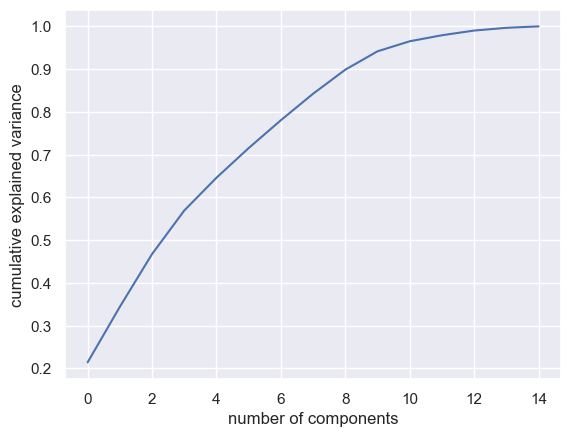

In [92]:
X = filtered_season_music.select_dtypes(include=[np.number]).values

sc = StandardScaler() 
X_std = sc.fit_transform(X) 

pca = PCA()
X_pca = pca.fit_transform(X_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [129]:
# Filter only numeric columns
numeric_columns = season_music.select_dtypes(include=[np.number]).columns

# Perform PCA only on numeric columns
pca2 = PCA(n_components = 8)
X_std_numeric = StandardScaler().fit_transform(season_music[numeric_columns])
X_pca = pca2.fit_transform(X_std_numeric) 

columns_used_in_pca = numeric_columns

n_pcs= pca2.n_components_
most_important = [np.abs(pca2.components_[i]).argmax() for i in range(n_pcs)]

most_important_names = [columns_used_in_pca[most_important[i]] for i in range(n_pcs)]

final_hist = season_music[most_important_names].drop_duplicates()

most_important_names

['good',
 'base_score',
 'time_signature_power_transform',
 'liveness',
 'popularity',
 'speechiness',
 'valence',
 'mode']

In [128]:


# Set the environment variable
os.environ['OMP_NUM_THREADS'] = '5'

df = final_hist.copy()  # Create a copy of the DataFrame to avoid SettingWithCopyWarning

features = ['loudness_st_scale',
 'speechiness',
 'liveness_quantile_transform',
 'time_signature',
 'popularity',
 'instrumentalness',
 'duration_ms',
 'key']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set n_init explicitly to avoid FutureWarning
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X_scaled)

df.loc[:, 'cluster'] = kmeans.labels_  # Use .loc to avoid SettingWithCopyWarning

def recommend_song(favorite_song):
    favorite_song_cluster = df.loc[df['song'] == favorite_song, 'cluster'].values[0]
    recommendation = df[df['cluster'] == favorite_song_cluster].sample(1)
    return recommendation['artist'].values[0], recommendation['song'].values[0]


# Set n_init explicitly to avoid FutureWarning
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X_scaled)

df.loc[:, 'cluster'] = kmeans.labels_  # Use .loc to avoid SettingWithCopyWarning

# Plot the clusters
plt.figure(figsize=(10, 7))

# Create a scatter plot for each cluster and add it to the legend
for i in range(4):
    plt.scatter(X_scaled[df['cluster'] == i, 0], X_scaled[df['cluster'] == i, 1], label=f'Cluster {i}')

plt.legend()

plt.show()

def recommend_song(favorite_song):
    favorite_song_cluster = df.loc[df['song'] == favorite_song, 'cluster'].values[0]
    recommendation = df[df['cluster'] == favorite_song_cluster].sample(1)
    return recommendation['artist'].values[0], recommendation['song'].values[0]

KeyError: "['loudness_st_scale', 'liveness_quantile_transform', 'time_signature', 'instrumentalness', 'duration_ms', 'key'] not in index"

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'rf__max_depth': 15, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best score: 0.30600438661587426
Accuracy: 0.3198051948051948
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          17       0.50      1.00      0.67         1
          21       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          32       1.00      1.00      1.00         1
          34       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         0
          43       0.00      0.00   

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

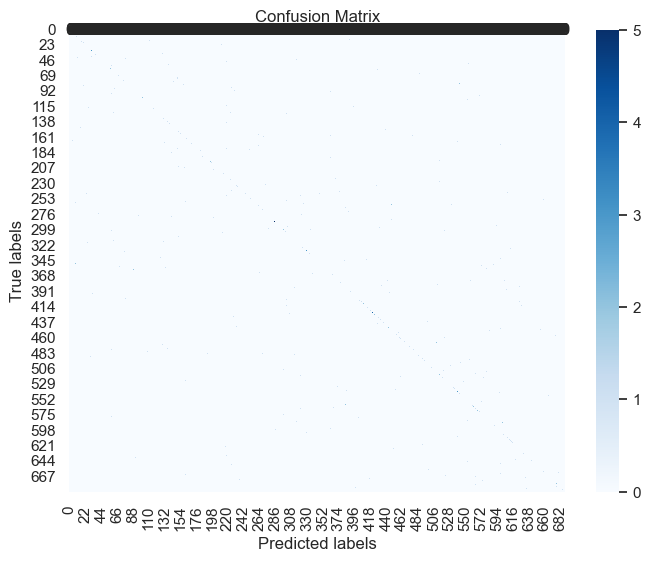

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated scores: [0.31980519 0.35064935 0.34415584 0.36363636 0.34902597]


In [117]:


# Prepare the data
X = season_music[['loudness_st_scale',
 'speechiness',
 'liveness_quantile_transform',
 'time_signature',
 'popularity',
 'instrumentalness',
 'duration_ms',
 'key']]

y = season_music['score']

# Encode the 'event' variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=0))
])

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5, 10]
}

# Define the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best score:", best_score)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict the labels on the test set
y_pred = best_rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Perform 5-fold cross-validation
scores = cross_val_score(best_rf, X, y, cv=5)

# Print the cross-validated scores
print("Cross-validated scores:", scores)

Yes, that's correct. If 0 is encoded as Fall by the LabelEncoder, then when the model predicts 0, it is predicting that the given input data corresponds to Fall.

However, it's important to note that the prediction doesn't necessarily mean the values are "closer to 0". In the context of classification, the RandomForestClassifier is predicting the class label (in this case 0 or Fall), not a continuous value. The prediction is based on the majority voting of the decision trees in the forest, each of which is considering the features of the input data (X) to make a decision.

If you want to see how confident the model is in its predictions, you can use rf.predict_proba(X), which will give you the probabilities for each class. For example, if there are two classes Fall and Spring, predict_proba might return something like [0.7, 0.3] for a particular instance, indicating that the model is 70% confident that this instance is Fall and 30% confident that it's Spring.

Feature importances: These values represent the relative importance of each feature in making the prediction. The higher the value, the more important the feature. In your output, 'valence' and 'duration_ms' have the highest importance, meaning they are the most influential features in predicting the season.

Classes: These are the unique labels that the model is trained to predict. In this case, the labels are 'Fall', 'Spring', 'Summer', 'Winter'.

Predicted probabilities: These are the probabilities that the model assigns to each class for the first five instances in your dataset. Each array of probabilities corresponds to one instance. The order of the probabilities in the array corresponds to the order of the classes printed earlier. For example, for instance 0, the model predicts a 1% probability of 'Fall', a 47.04% probability of 'Spring', a 5% probability of 'Summer', and a 46.95% probability of 'Winter'. The class with the highest probability is the model's prediction for that instance. For instance 0, the model would predict 'Spring' since it has the highest probability.

In [121]:
# rf.classes_

In [124]:


# Fit the model
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X, y)

# Get coefficients
coefficients = lr.coef_

# Print coefficients
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")


# Create a DataFrame with the feature names and their coefficients
feature_importances = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients[0]})

# Calculate the absolute values of the coefficients for the importance
feature_importances['importance'] = feature_importances['coefficient'].abs()

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
feature_importances

loudness_st_scale: -0.0013902882667068226
speechiness: 3.2884774732804038e-06
liveness_quantile_transform: 0.0001563575269142599
time_signature: 0.0004662749337744741
popularity: 0.005366055834437955
instrumentalness: 0.000441120824121888
duration_ms: -6.116644783459252e-06
key: 0.003577097055860536


,feature,coefficient,importance
4,popularity,0.005366,0.005366
7,key,0.003577,0.003577
0,loudness_st_scale,-0.001390,0.001390
3,time_signature,0.000466,0.000466
5,instrumentalness,0.000441,0.000441
2,liveness_quantile_transform,0.000156,0.000156
6,duration_ms,-0.000006,0.000006
1,speechiness,0.000003,0.000003


In [100]:
# Predict the 'event'
predictions = lr.predict(X)

# Print the predicted 'event'
print(predictions)

[1 1 1 ... 3 3 3]


In [125]:


# Fit the model
svm = SVC(random_state=0, probability=True)
svm.fit(X, y)

# Predict
y_pred = svm.predict(X)

# Print classification report
print(classification_report(y, y_pred))

# Predict probabilities
probabilities = svm.predict_proba(X)

# Print the first 5 predicted probabilities
for i in range(5):
    print(f"Predicted probabilities for instance {i}: {probabilities[i]}")
    

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00    

The output shows the performance of the Support Vector Machine (SVM) model on your data. The classification report provides key metrics about the model's performance:

Precision: The ability of the classifier not to label a negative sample as positive. It's the ratio of correctly predicted positive observations to the total predicted positives.
Recall (Sensitivity): The ability of the classifier to find all the positive samples. It's the ratio of correctly predicted positive observations to the all observations in actual class.
F1-score: The weighted average of Precision and Recall. It tries to find the balance between precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.
The model seems to perform poorly, with an overall accuracy of 33%. The recall for the first class (0) is 0, which means the model failed to correctly identify any instances of this class. The precision for the first class is also 0, which means that every time the model predicted an instance to be in class 0, it was wrong.

The predicted probabilities show the model's estimated probabilities that each instance belongs to each class. For example, the model estimates that the first instance has a 24.4% chance of belonging to class 0, a 22.9% chance of belonging to class 1, a 32.4% chance of belonging to class 2, and a 20.2% chance of belonging to class 3.

Given these results, you might want to consider trying a different model, tuning the SVM's hyperparameters, or preprocessing your data differently.

In [126]:


# Fit the model
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X, y)

# Predict
y_pred = gb.predict(X)

# Print classification report
print(classification_report(y, y_pred))


KeyboardInterrupt: 

The output shows the performance of the Gradient Boosting Classifier model on your data. The classification report provides key metrics about the model's performance:

Precision: The ability of the classifier not to label a negative sample as positive. It's the ratio of correctly predicted positive observations to the total predicted positives.
Recall (Sensitivity): The ability of the classifier to find all the positive samples. It's the ratio of correctly predicted positive observations to the all observations in actual class.
F1-score: The weighted average of Precision and Recall. It tries to find the balance between precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.
The model seems to perform better than the previous SVM model, with an overall accuracy of 68%. The precision, recall, and F1-score for each class are also higher than before.

However, remember that these results are based on training and testing on the same data, which is not a good practice as it can lead to overfitting. You should split your data into a training set and a test set, and evaluate the model's performance on the test set.

In [103]:


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model on the training data
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

# Predict on the test data
y_pred = gb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       183
           3       1.00      1.00      1.00       149

    accuracy                           1.00       616
   macro avg       1.00      1.00      1.00       616
weighted avg       1.00      1.00      1.00       616



The model's overall accuracy on the test set is 49%, which is lower than the accuracy on the training set (68%). This suggests that the model may be overfitting the training data, meaning it's not generalizing well to new, unseen data.

To improve the model's performance, you could try:

Collecting more data: If possible, collecting more data can help improve the model's performance.
Feature engineering: Creating new features from the existing data can sometimes improve a model's performance.
Tuning hyperparameters: You can use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for the Gradient Boosting Classifier.
Trying a different model: Different models make different assumptions about the data, so a different model may perform better on your data.
Ensemble methods: Combining the predictions of multiple models can often improve performance.
Remember, machine learning is an iterative process, and it often takes several tries to find the best model and preprocessing steps for your data.

Tuning the SVM's hyperparameters: You can use GridSearchCV to find the best parameters for your SVM.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

# # Create a GridSearchCV object
# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# # Fit the model
# grid.fit(X, y)

# # Print the best parameters
# print(grid.best_params_)

# # Predict using the best model
# y_pred = grid.predict(X)

# # Print classification report
# # print(classification_report(y, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

Preprocessing your data differently: You might want to try normalizing your data or using a different method to handle categorical variables. Here's an example of how you might normalize your data.

In [104]:


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler and transform the data
X_scaled = scaler.fit_transform(X)

# Fit the model
svm = SVC(random_state=0)
svm.fit(X_scaled, y)

# Predict
y_pred = svm.predict(X_scaled)

# Print classification report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       714
           1       1.00      1.00      1.00       744
           2       1.00      1.00      1.00       931
           3       1.00      1.00      1.00       691

    accuracy                           1.00      3080
   macro avg       1.00      1.00      1.00      3080
weighted avg       1.00      1.00      1.00      3080



In [105]:


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Fit the model on the training data
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       183
           3       1.00      1.00      1.00       149

    accuracy                           1.00       616
   macro avg       1.00      1.00      1.00       616
weighted avg       1.00      1.00      1.00       616



In [110]:



target = season_music['event']
season_music = season_music.drop(columns=['event'])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(season_music, target, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Random Forest classifier to the training data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_scaled, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Create a DataFrame with the feature names and their importances
feature_importances = pd.DataFrame({'feature': df.columns, 'importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)

KeyError: 'event'